In [4]:
%run "../1. Librerias Mongo/MongoDB_Connections.ipynb"
%run "../1. Librerias Mongo/MongoDB_Funciones_Consultas.ipynb"

# from ipynb.fs.full.MongoDB_Connections import _connect_mongo

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _resumen_mensual_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_por_estacion
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes_por_estacion

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_full
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio_mes

# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations
# from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations_EstacionesMeteo

import time
import pandas as pd
# pd.options.display.float_format = '{:,}'.format

## Conexión a Mongo

In [5]:
db_Tracks = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Tracks_Demanda')
db_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Meteo_NivelHora')
db_Stations = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_Master')
db_Stations_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_EstacionMeteo')

Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard-00-00.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-01.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-02.15npsxw.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-xyv6ql-shard-0', tls=True, serverselectiontimeoutms=4000, tlscafile='C:\\ProgramData\\Anaconda3\\lib\\site-packages\\certifi\\cacert.pem'), 'BiciMAD'), 'Tracks_Demanda')
Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard-00-00.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-01.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-02.15npsxw.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-xyv6ql-shard-0', tls=True, serverselectiontimeoutms=4000, tlscafile='C:\\ProgramData\\Anaconda3\\lib\\site-packages\\certifi\\cacert.pem'), 'BiciMAD'), 'Meteo_NivelHora')
Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard

## Descarga datos

In [6]:
# # Tracks
#t_ini = time.time()
#data_Tracks_2017 = _data_anio(db_Tracks, 2017)
#data_Tracks_2018 = _data_anio(db_Tracks, 2018)
#data_Tracks_2019 = _data_anio(db_Tracks, 2019)
#data_Tracks_2020 = _data_anio(db_Tracks, 2020)
#data_Tracks_2021 = _data_anio(db_Tracks, 2021)
#t_end = time.time()

#print ((t_end - t_ini)/60)

#data_Tracks = pd.concat([
#     data_Tracks_2017,
#     data_Tracks_2018,
#     data_Tracks_2019,
#     data_Tracks_2020,
#     data_Tracks_2021])

#data_Tracks.shape

In [7]:
import time
import pandas as pd
import numpy as np

In [8]:
t_ini = time.time()
#data_Tracks = pd.read_csv('/Users/miguelflores/Desktop/TFM/DataFullTracks_MongoDB.csv')
data_Tracks = pd.read_csv('../../DATA/DataTracks_MongoDB_2018-2020-Ene-Feb.csv')
t_end = time.time()
print (t_end - t_ini)

C:\Users\gonza\AppData\Local\Temp\ipykernel_12460\1952629148.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_Tracks = pd.read_csv('../../DATA/DataTracks_MongoDB_2018-2020-Ene-Feb.csv')


10.046216249465942


In [9]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8266481 entries, 0 to 8266480
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ANIO              int64  
 1   MES               int64  
 2   DIA               int64  
 3   HORA              int64  
 4   DIA_SEMANA        int64  
 5   AM_PM             object 
 6   TEMPORADA         object 
 7   TEMPORADA_NUM     float64
 8   UNPLUG_TIME_date  object 
 9   travel_time       int64  
 10  idunplug_station  int64  
 11  user_type         int64  
 12  ageRange          int64  
 13  zip_code          object 
 14  Es_Festivo        int64  
 15  Es_FinSemana      int64  
 16  DEMANDA           int64  
dtypes: float64(1), int64(12), object(4)
memory usage: 1.0+ GB


In [11]:
data_Tracks = data_Tracks[data_Tracks['ANIO']<=2019]
data_Tracks = data_Tracks[data_Tracks['ANIO']>=2018]
data_Tracks.shape

(7654514, 17)

### Missing values

In [12]:
data_Tracks.isnull().sum()

ANIO                      0
MES                       0
DIA                       0
HORA                      0
DIA_SEMANA                0
AM_PM                     0
TEMPORADA                 0
TEMPORADA_NUM             0
UNPLUG_TIME_date          0
travel_time               0
idunplug_station          0
user_type                 0
ageRange                  0
zip_code            3534514
Es_Festivo                0
Es_FinSemana              0
DEMANDA                   0
dtype: int64

### EDA: idunplug_station

In [13]:
data_inplug_station = data_Tracks[['idunplug_station','DEMANDA']]
data_inplug_station = data_inplug_station.groupby(['idunplug_station']).sum('Demanda')

<AxesSubplot:xlabel='idunplug_station'>

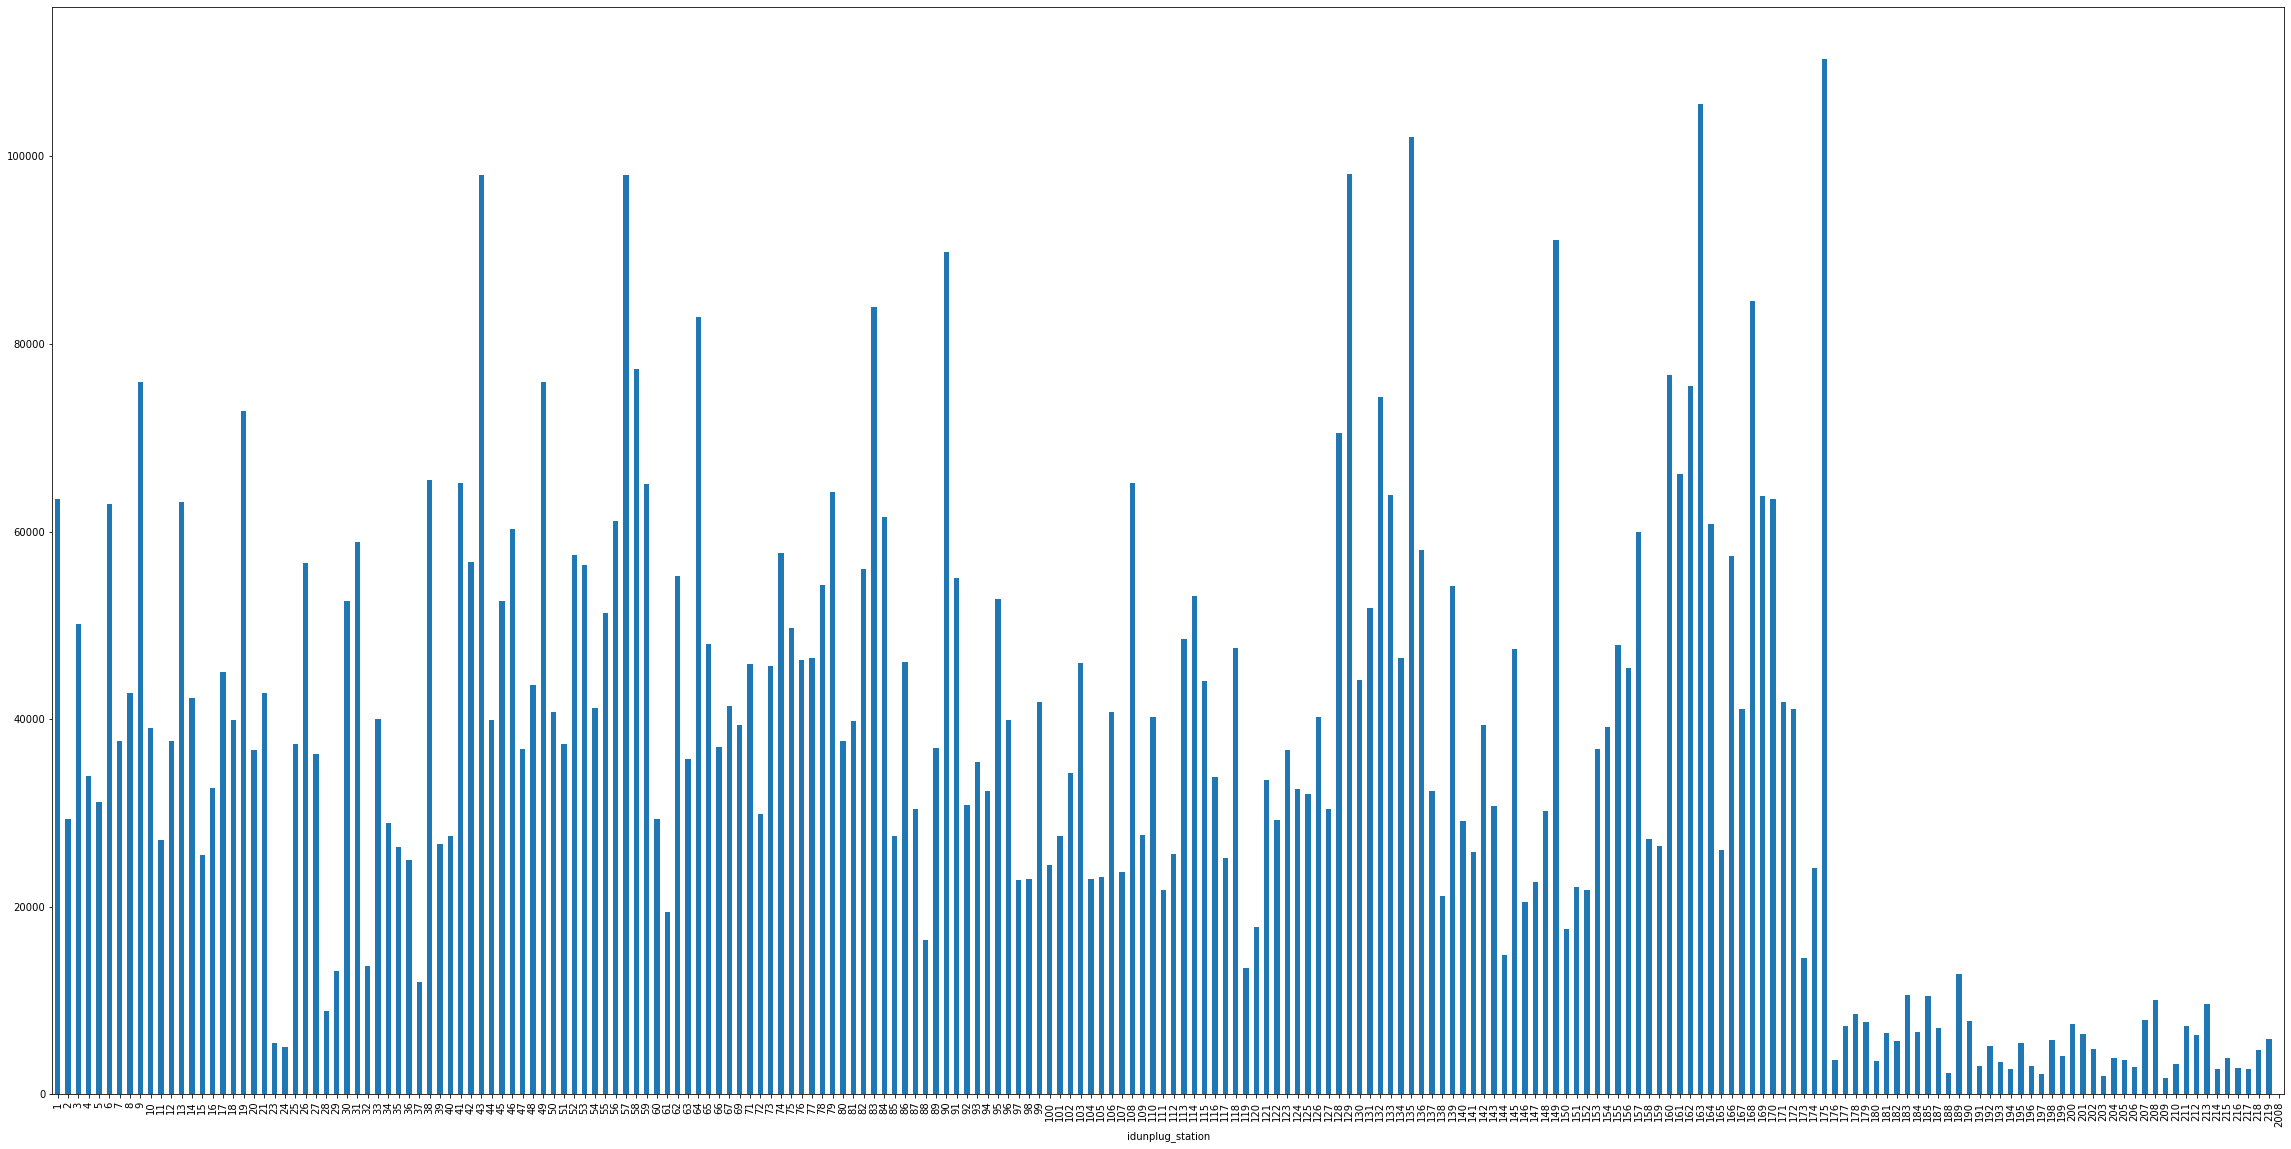

In [14]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (40, 20)

data_inplug_station['DEMANDA'].plot(kind = 'bar')

 ##### TOP 10 Estaciones con más uso

In [15]:
data_inplug_station = data_inplug_station.sort_values('DEMANDA',ascending=False)
data_inplug_station['DEMANDA'].head(10)

idunplug_station
175    110376
163    105541
135    102006
129     98123
57      98004
43      97987
149     91077
90      89751
168     84566
83      83905
Name: DEMANDA, dtype: int64

### Evolución de la demanda por mes y año

In [16]:
data_mes_anio = data_Tracks[['ANIO','MES','DEMANDA']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,DEMANDA
0,2018,1,263883
1,2018,2,232012
2,2018,3,215736
3,2018,4,297430
4,2018,5,289656
5,2018,6,327144
6,2018,7,382807
7,2018,8,274353
8,2018,9,436318
9,2018,10,385640


<AxesSubplot:xlabel='ANIO', ylabel='DEMANDA'>

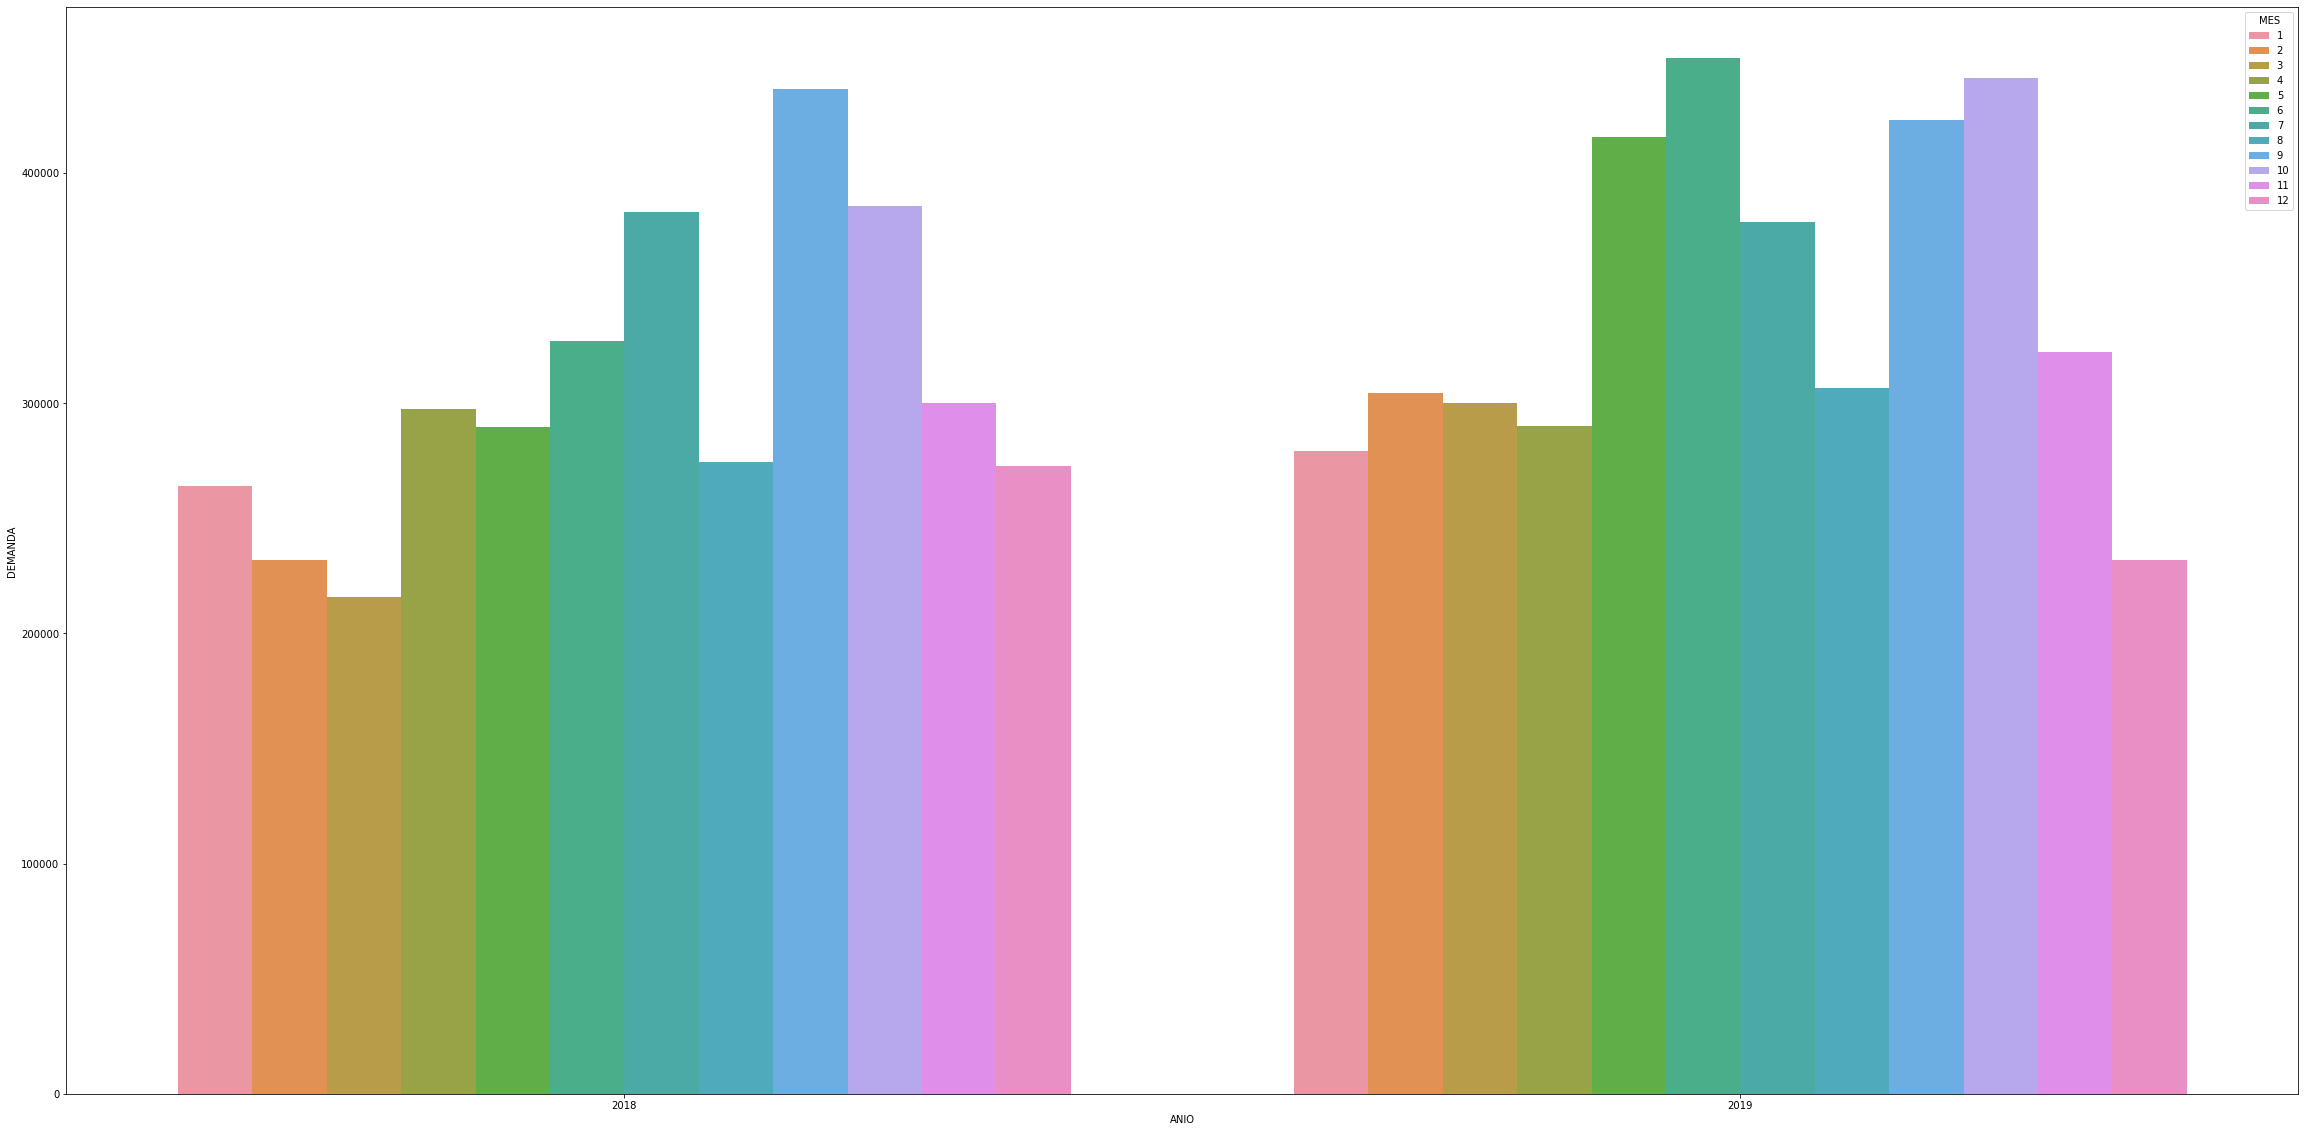

In [17]:
import seaborn as sns
sns.barplot(x="ANIO", y="DEMANDA", 
            hue="MES", data=data_mes_anio) 

## Demanda por día de la semana

<AxesSubplot:xlabel='DIA', ylabel='DEMANDA'>

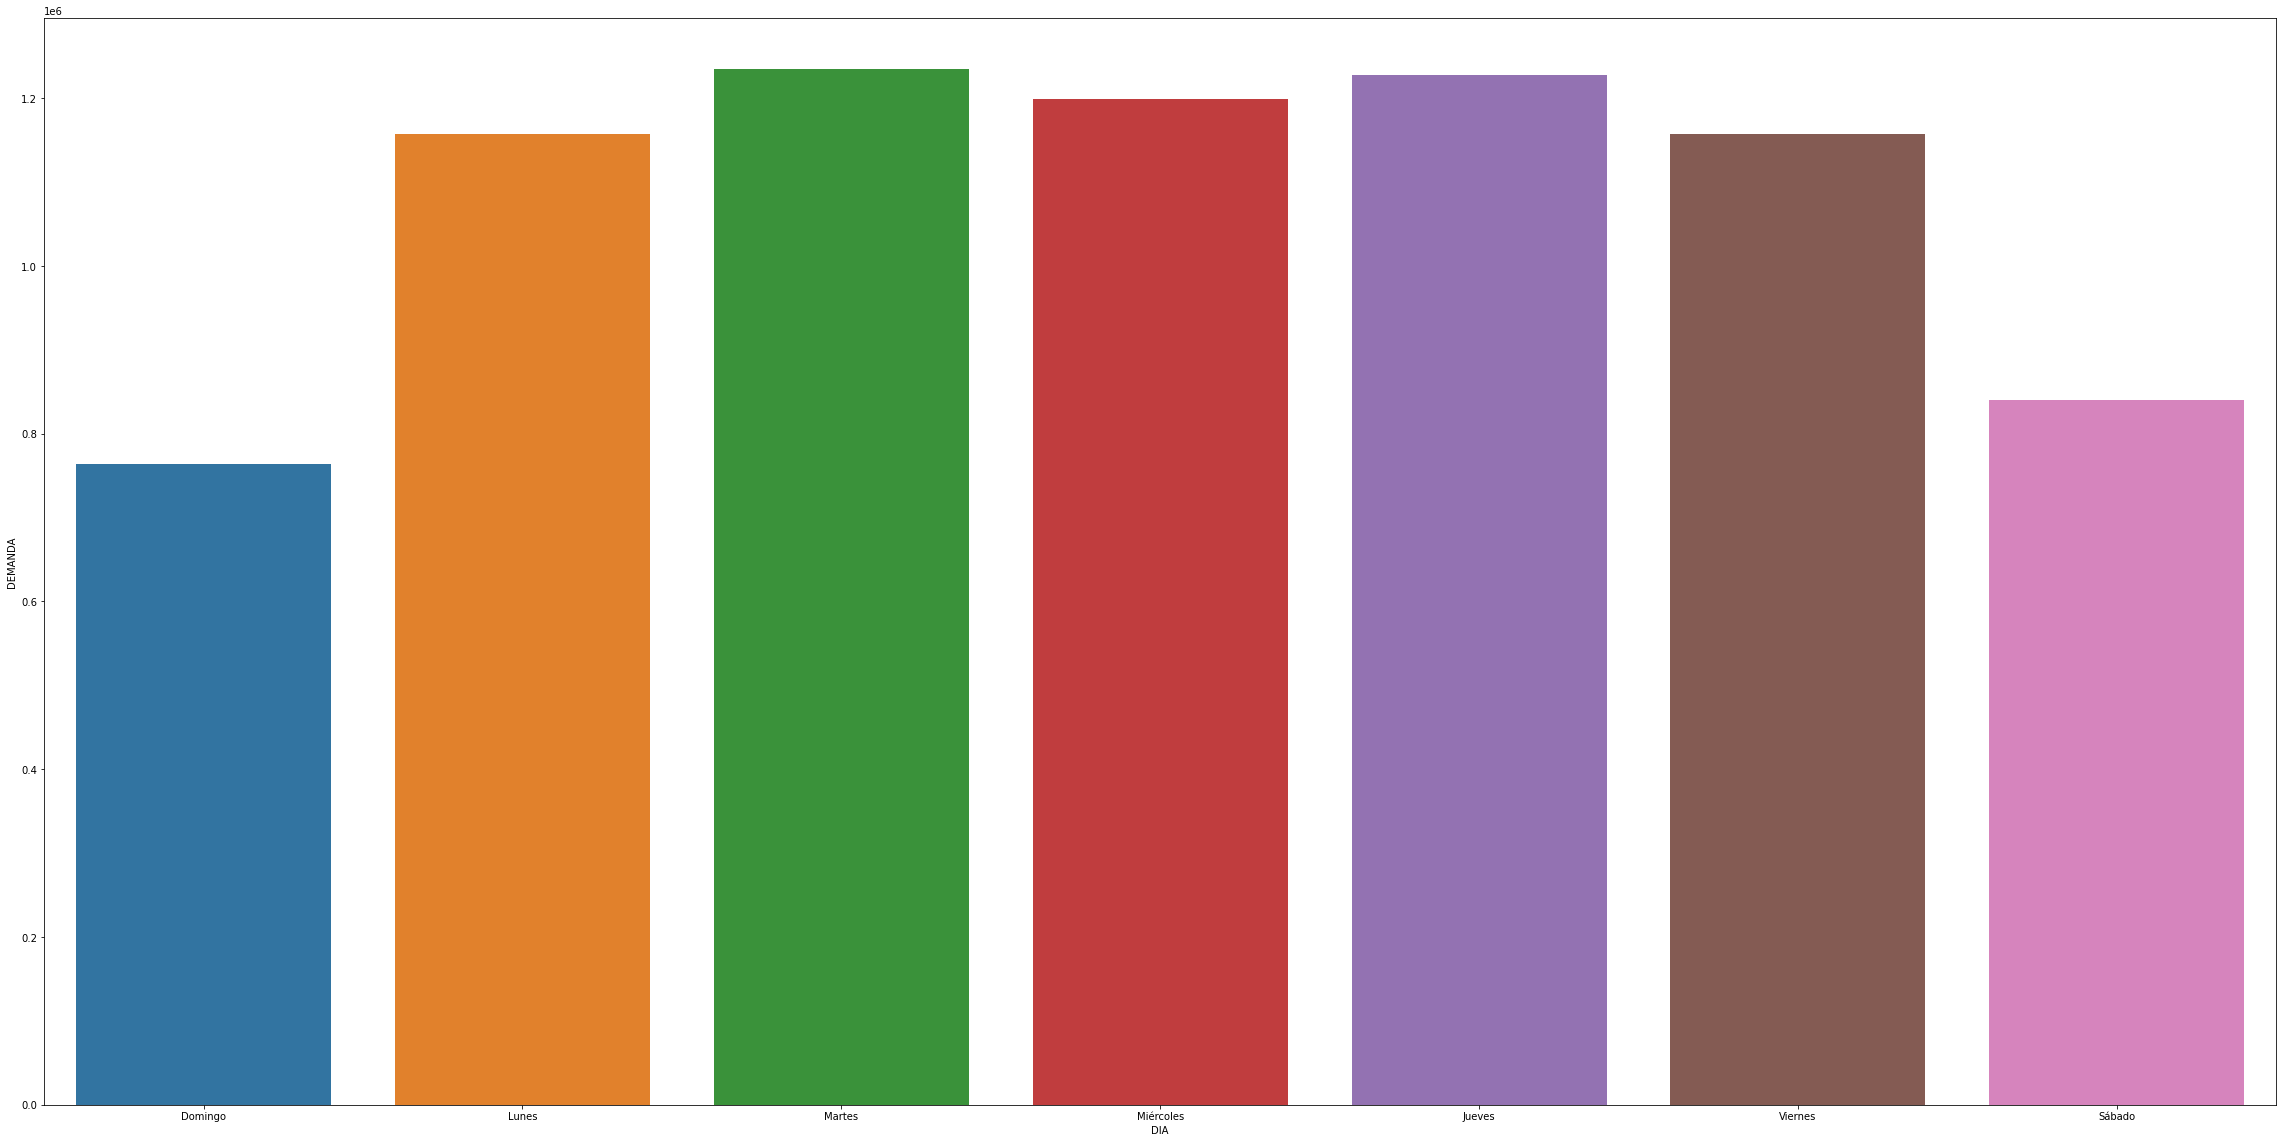

In [20]:
data_dia_sem = data_Tracks[['DIA_SEMANA','DEMANDA']]
data_dia_sem = data_dia_sem.groupby(['DIA_SEMANA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_dia_sem = data_dia_sem.reset_index() 
conditionlist = [
    (data_dia_sem['DIA_SEMANA'] == 2),
    (data_dia_sem['DIA_SEMANA'] == 3),
    (data_dia_sem['DIA_SEMANA'] == 4),
    (data_dia_sem['DIA_SEMANA'] == 5),
    (data_dia_sem['DIA_SEMANA'] == 6),
    (data_dia_sem['DIA_SEMANA'] == 7),
    (data_dia_sem['DIA_SEMANA'] == 1)]
choicelist = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
data_dia_sem['DIA'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="DIA", y="DEMANDA", data=data_dia_sem) 

### EDA: travel_time

In [21]:
data_Tracks['travel_time_mins'] = data_Tracks['travel_time']/60  # Convierte a minutos

Descripción general

In [22]:
data_Tracks['travel_time_mins'].describe()

count    7.414451e+06
mean     1.920899e+01
std      2.556517e+02
min     -1.616155e+04
25%      7.650000e+00
50%      1.153333e+01
75%      1.758333e+01
max      3.212148e+05
Name: travel_time_mins, dtype: float64

#### Boxplot por día de semana

<AxesSubplot:xlabel='DIA_SEMANA', ylabel='travel_time_mins'>

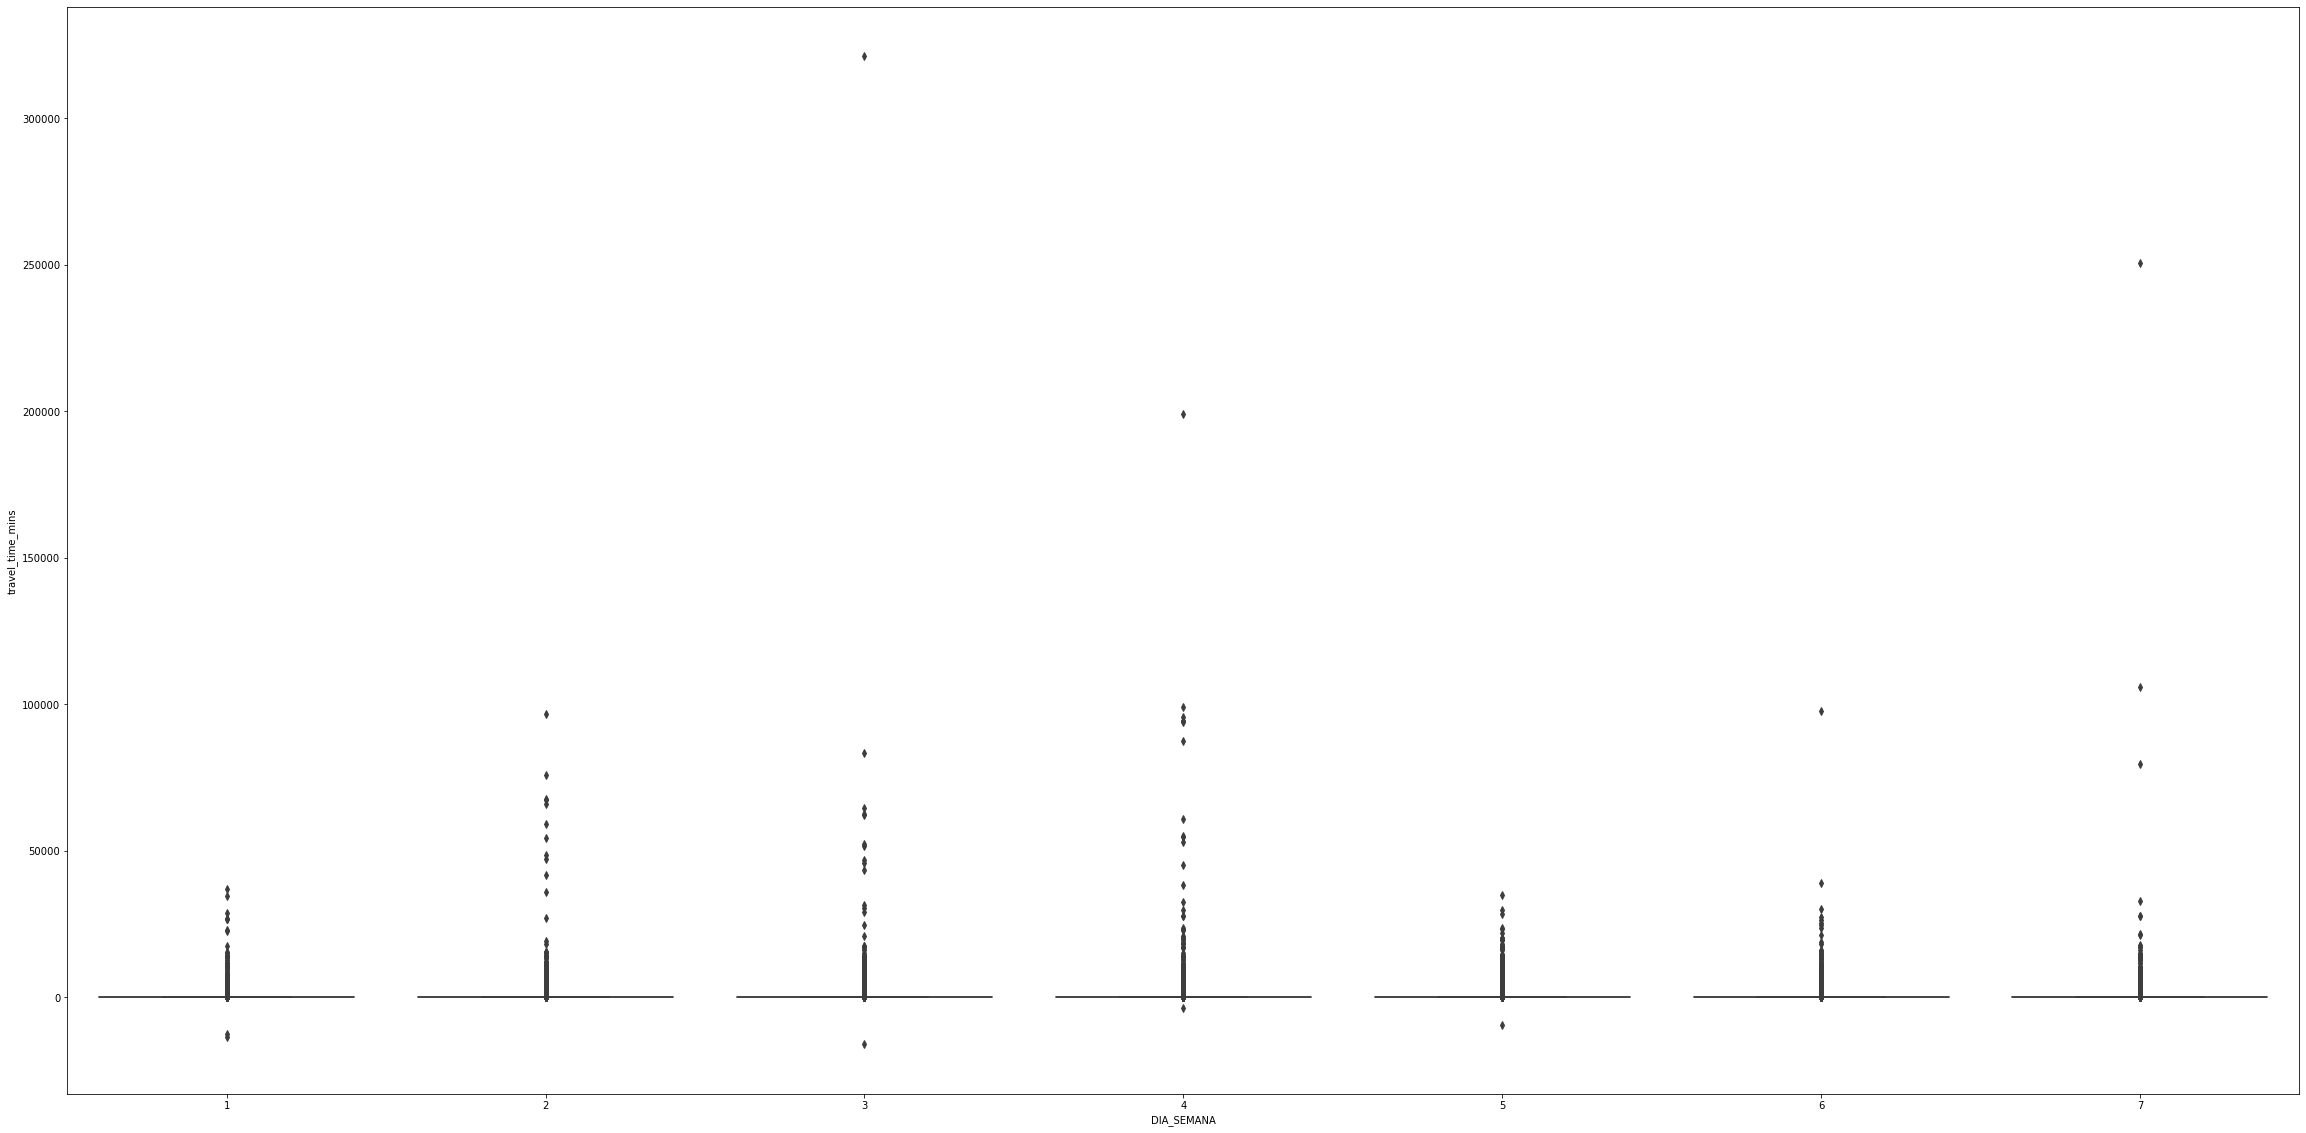

In [23]:
sns.boxplot(x = 'DIA_SEMANA',y='travel_time_mins', data=data_Tracks)

#### Histograma tiempo de viajes en BiciMAD

<AxesSubplot:>

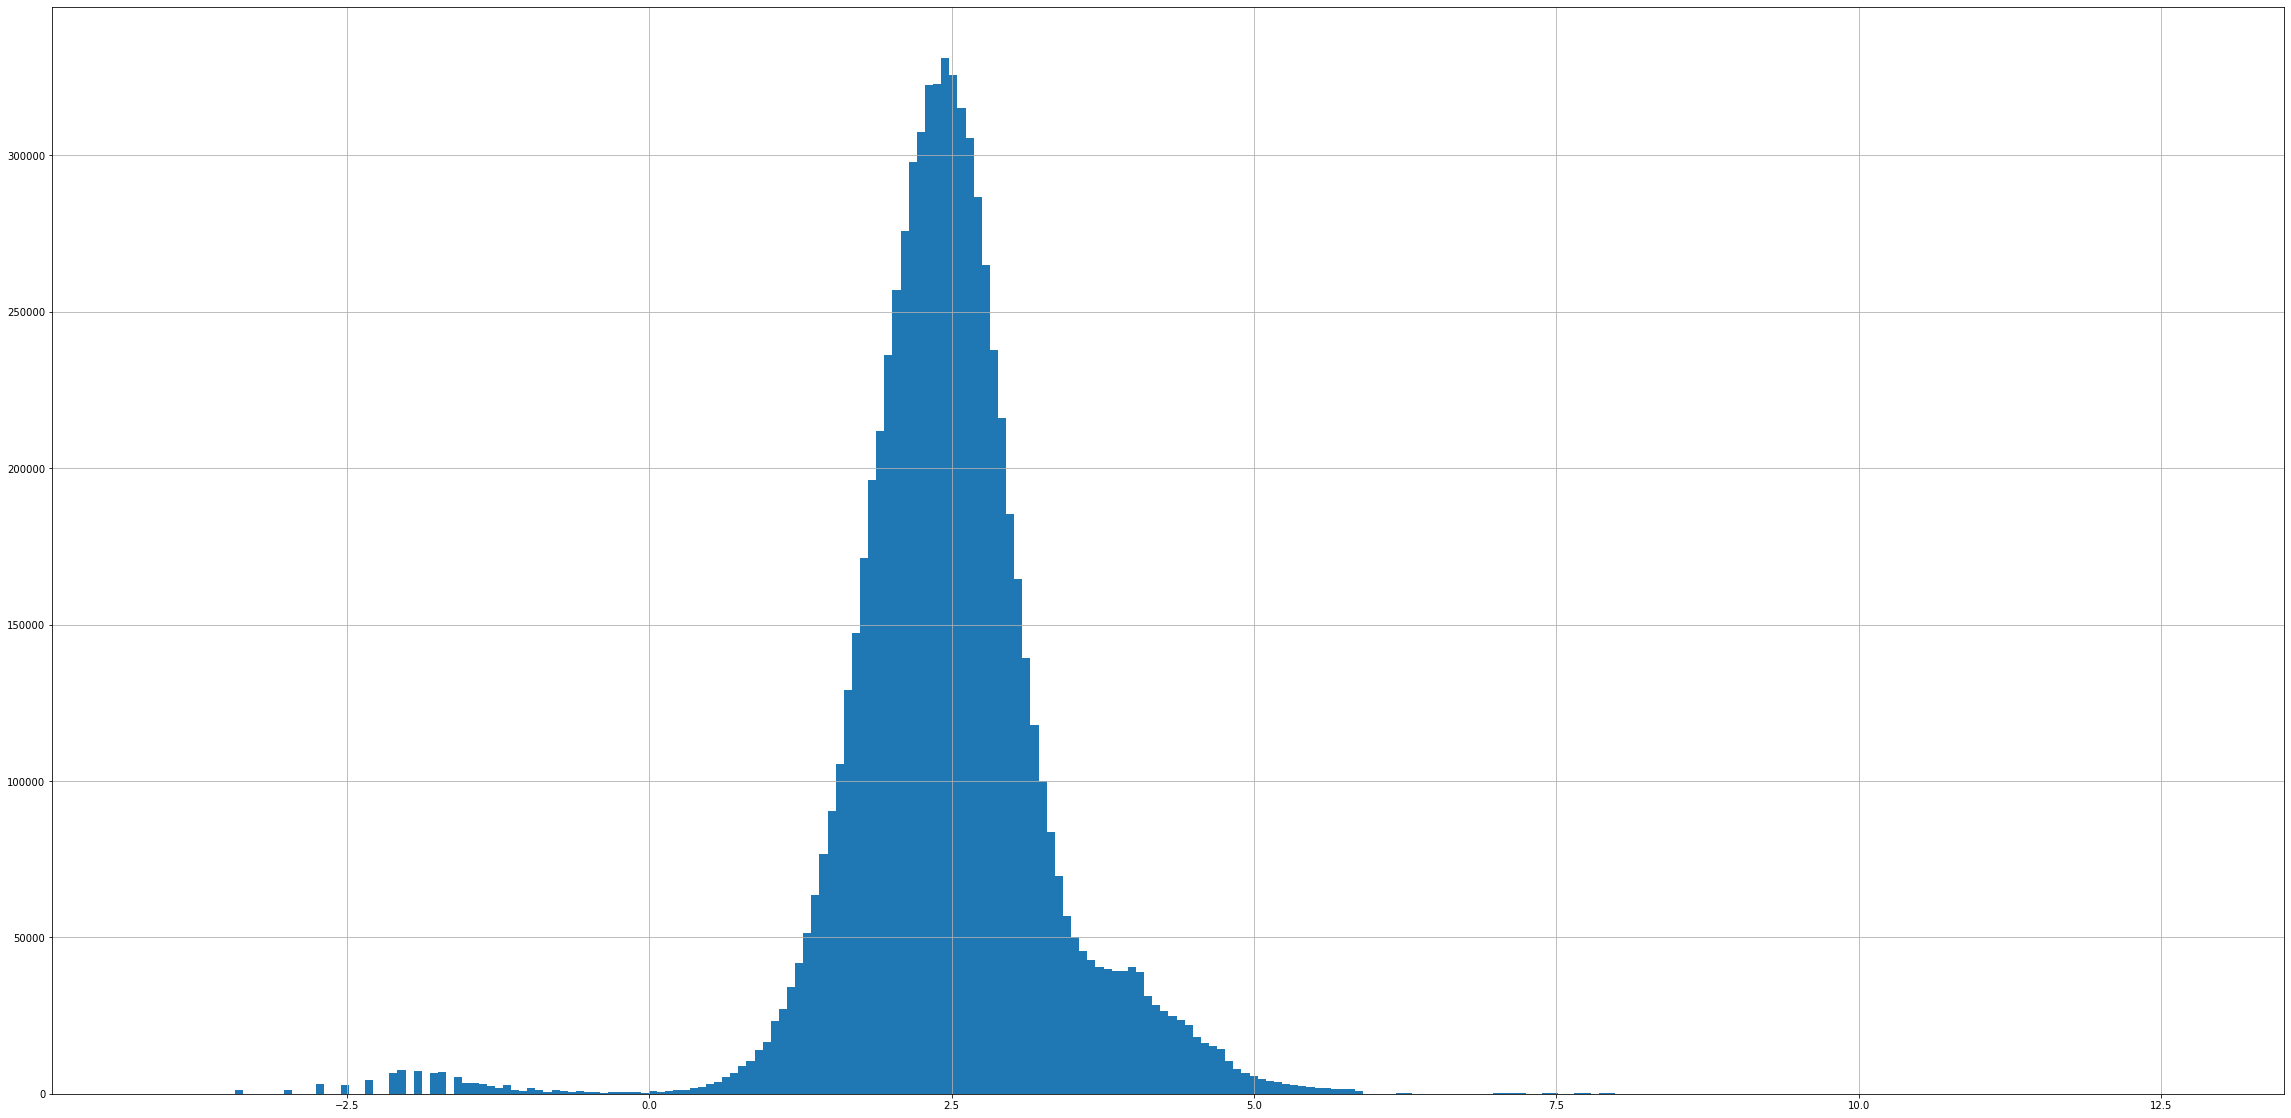

In [24]:
import numpy as np

# Convierte a logaritmo para graficar
df_nonzero_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]

data_Tracks['travel_time_mins_log'] = np.log(df_nonzero_travel_times['travel_time_mins'])
data_Tracks['travel_time_mins_log'].hist(bins=250)


<AxesSubplot:xlabel='DIA_SEMANA', ylabel='travel_time_mins'>

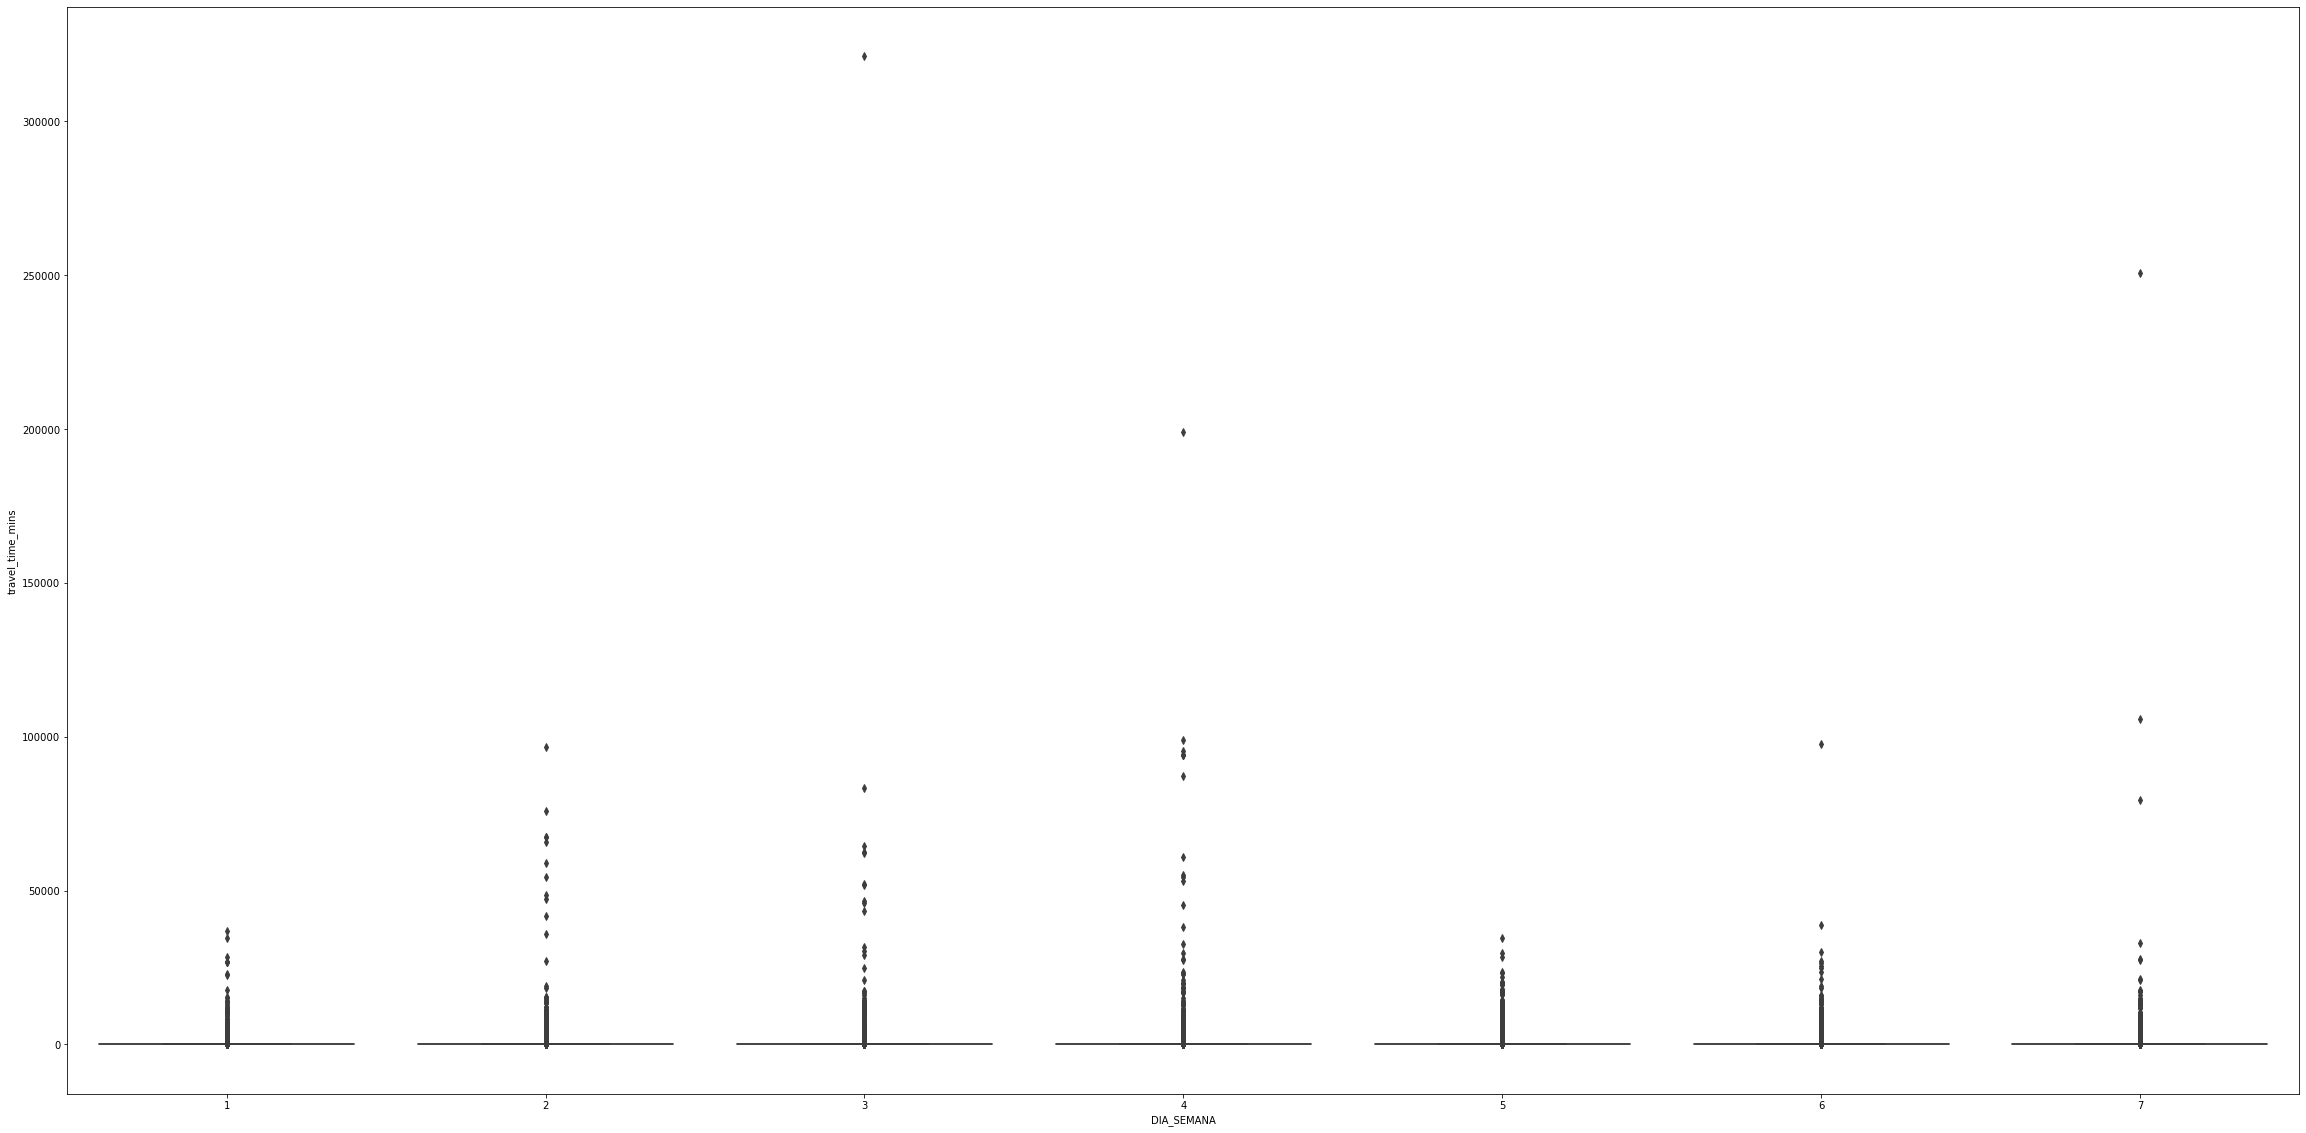

In [25]:
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]
sns.boxplot(x = 'DIA_SEMANA',y='travel_time_mins', data=df_non_extreme_travel_times)

### Tipos de Viaje

<AxesSubplot:xlabel='Tipo_Viaje', ylabel='Total'>

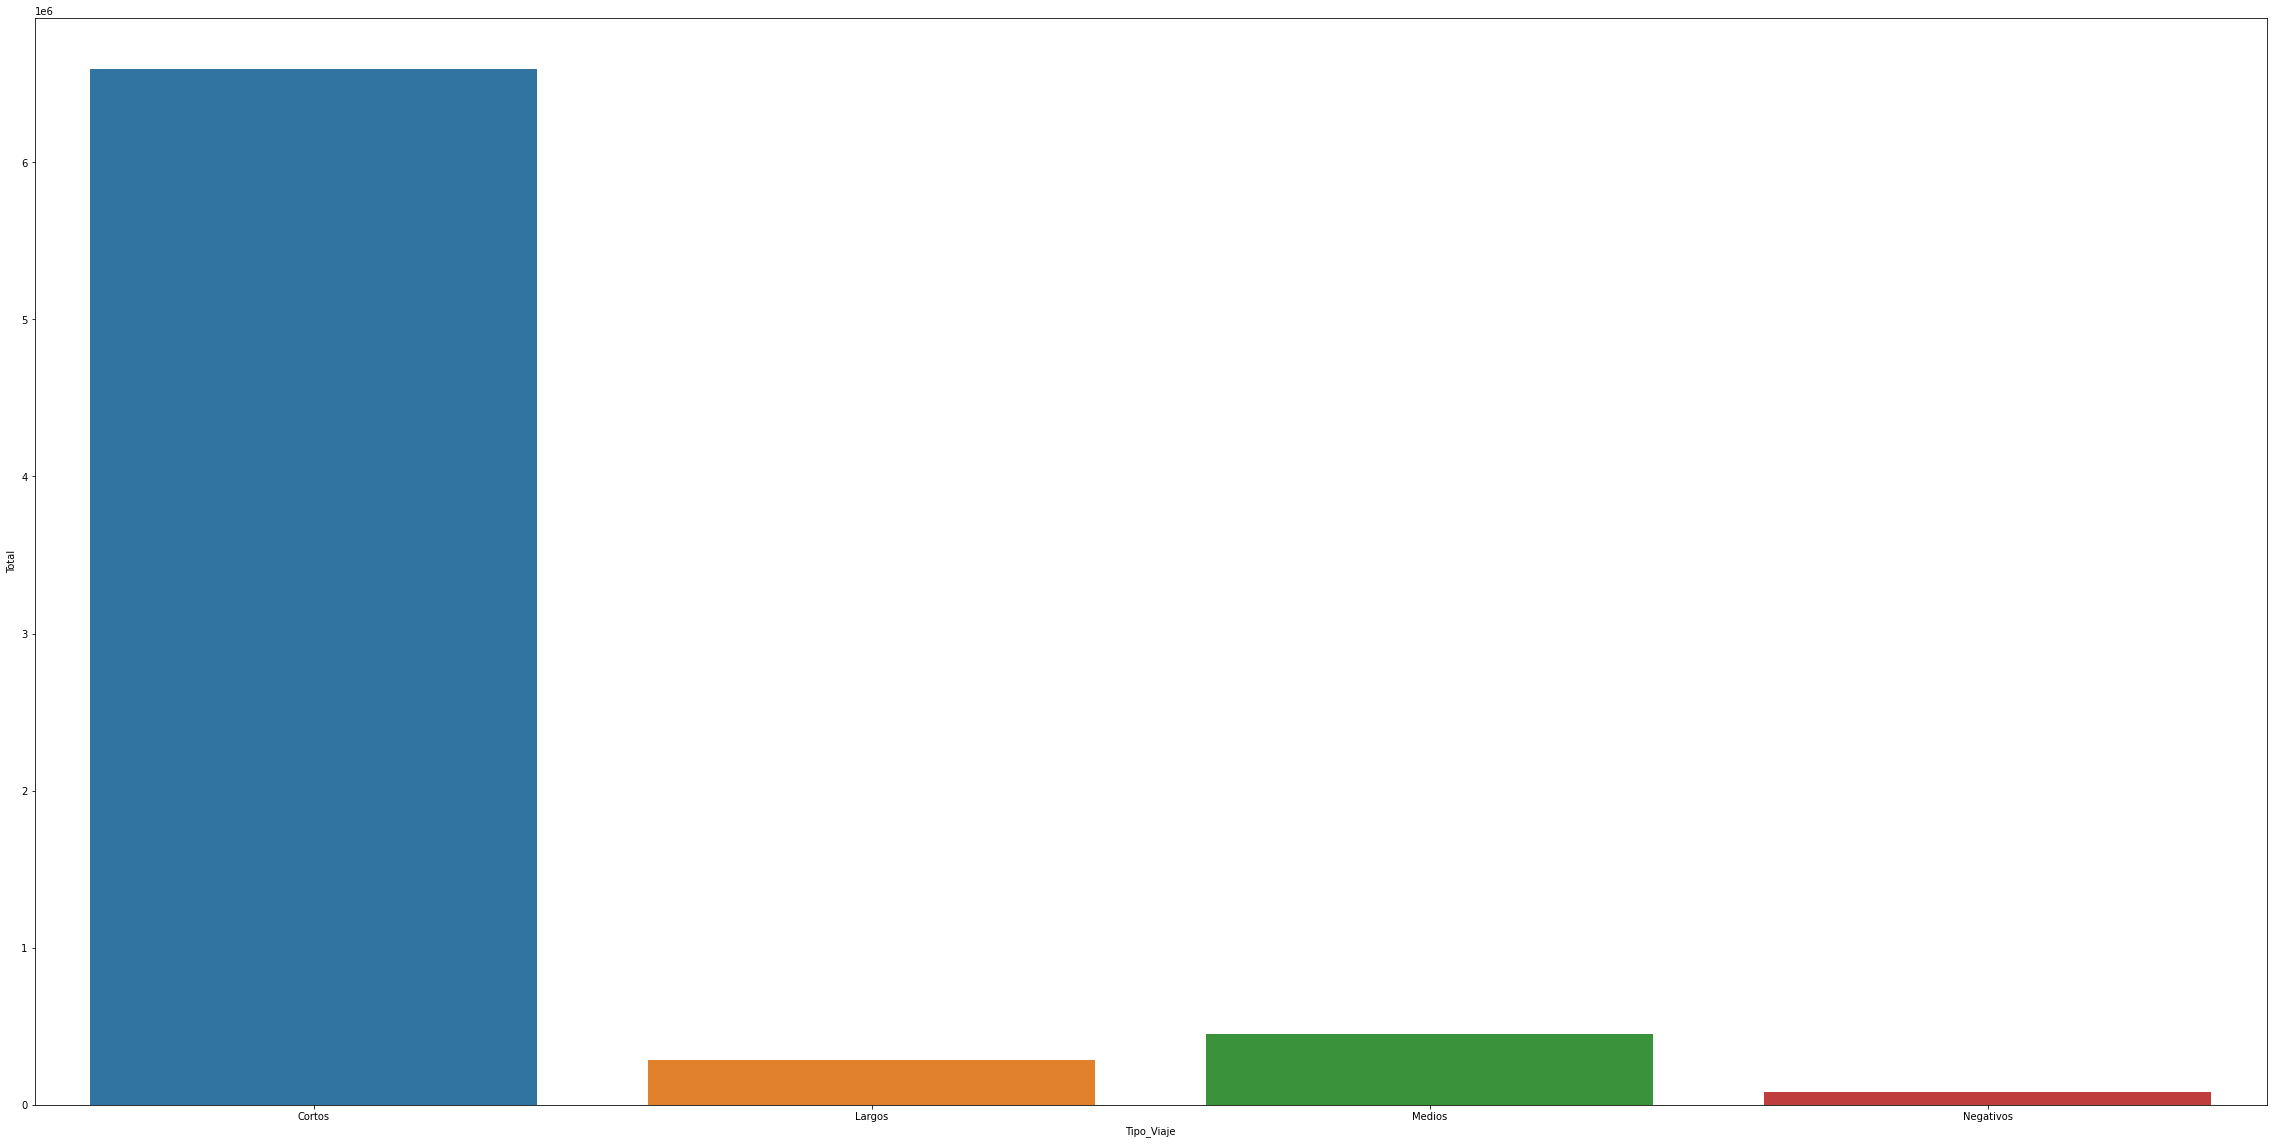

In [26]:
conditionlist = [
    (data_Tracks['travel_time_mins'] < 1) ,
    (data_Tracks['travel_time_mins'] >= 1) & (data_Tracks['travel_time_mins'] <30),
    (data_Tracks['travel_time_mins'] >= 30) & (data_Tracks['travel_time_mins'] <60),
    (data_Tracks['travel_time_mins'] >= 60)]
choicelist = ['Negativos', 'Cortos', 'Medios','Largos']
data_Tracks['Tipo_Viaje'] = np.select(conditionlist, choicelist, default='Not Specified')
data_viajes = data_Tracks.groupby(['Tipo_Viaje']).agg(Total=('Tipo_Viaje', 'count'))
data_viajes = data_viajes.reset_index() 
sns.barplot(x="Tipo_Viaje", y="Total", data=data_viajes) 

### Datos estadísticos por tipo de viaje

In [27]:
data_Tracks.groupby(['Tipo_Viaje'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo_Viaje,,,,,,,,
Cortos,6589685.0,11.877770,5.898131,1.00,7.400000,10.783333,15.316667,29.983333
Largos,286357.0,157.179804,1291.380599,60.00,70.750000,86.166667,114.516667,321214.816667
Medios,454000.0,42.252166,8.753352,30.00,34.383333,40.850000,49.516667,59.983333
Negativos,84409.0,-0.458548,91.295744,-16161.55,0.133333,0.183333,0.250000,0.983333


Viajes de menos de 180 segundos

In [28]:
total = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count()
print(total)

total_proc = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count() / data_Tracks['travel_time'].count() *100
print(total_proc)

193598
2.611090153539352


### EDA: origen vs destino

Estaciones en donde origen y destino son el mismo y el viaje es menor a 3 minutos

In [29]:
df_same_station = data_Tracks.loc[(data_Tracks['idunplug_station'] == data_Tracks['idplug_station'])]
print(df_same_station['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 10]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 60]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 180]['ANIO'].count())

KeyError: 'idplug_station'

### EDA: user_type

```
user_type = 0: Sin Registro
user_type = 1: Anual
user_type = 2: Ocasional
user_type = 3: Trabajador BiciMad
```

<AxesSubplot:xlabel='Tipo', ylabel='DEMANDA'>

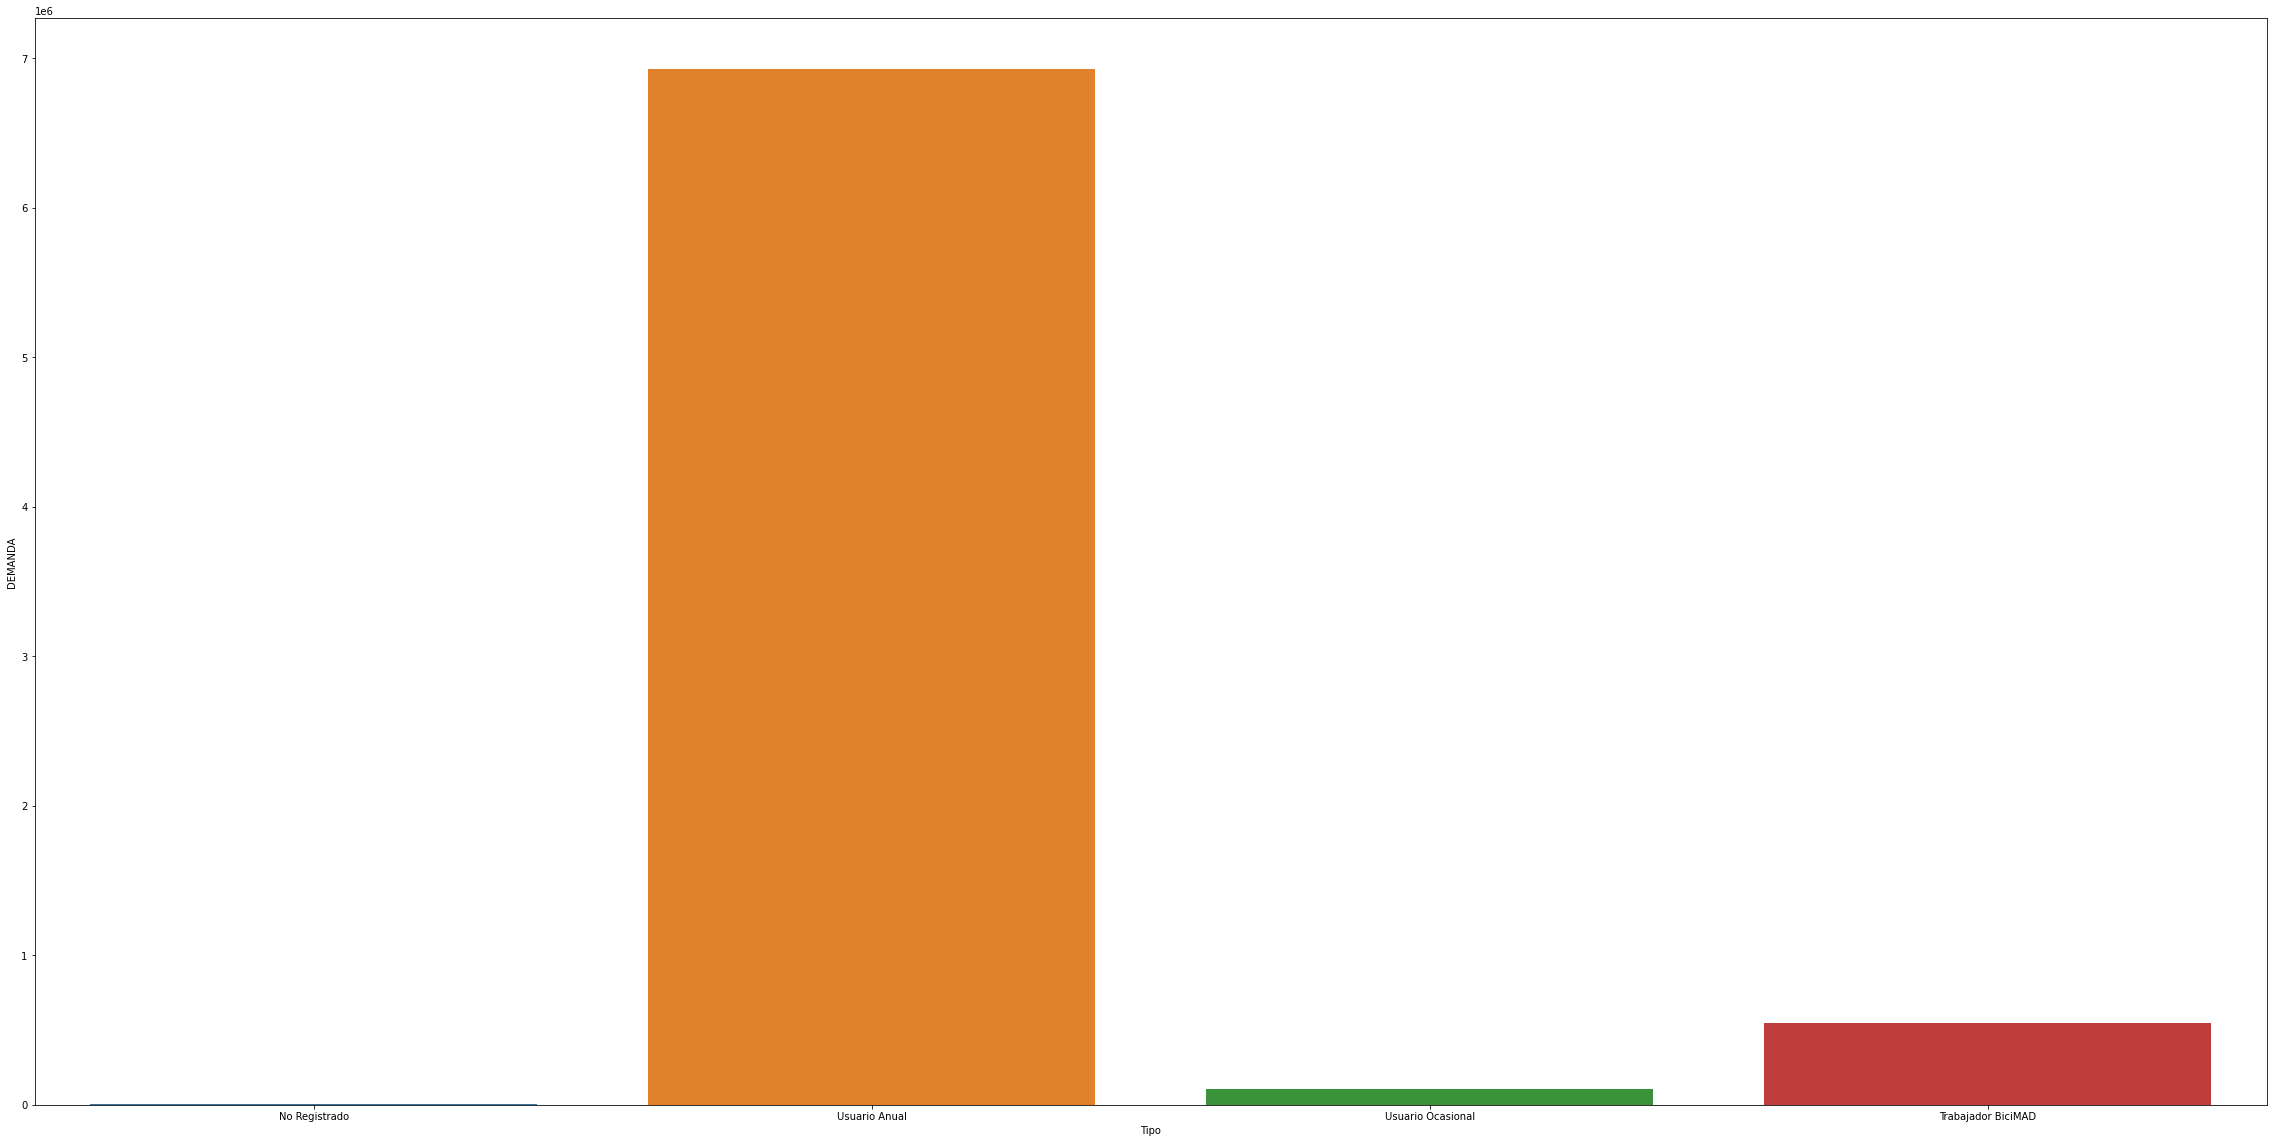

In [30]:
data_tipo_usuario = data_Tracks[['user_type','DEMANDA','travel_time_mins']]
data_tipo_usuario = data_tipo_usuario.groupby(['user_type']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_tipo_usuario = data_tipo_usuario.reset_index() 
conditionlist = [
    (data_tipo_usuario['user_type'] == 0),
    (data_tipo_usuario['user_type'] == 1),
    (data_tipo_usuario['user_type'] == 2),
    (data_tipo_usuario['user_type'] == 3),
    (data_tipo_usuario['user_type'] == 6),
    (data_tipo_usuario['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_tipo_usuario['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="Tipo", y="DEMANDA", data=data_tipo_usuario) 

In [31]:
conditionlist = [
    (data_Tracks['user_type'] == 0),
    (data_Tracks['user_type'] == 1),
    (data_Tracks['user_type'] == 2),
    (data_Tracks['user_type'] == 3),
    (data_Tracks['user_type'] == 6),
    (data_Tracks['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_Tracks['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Tipo'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
No Registrado,3938.0,36.091853,38.861095,1.400000,11.850000,21.966667,46.708333,326.583333
Trabajador BiciMAD,508070.0,71.165597,971.820869,-43.783333,15.416667,32.883333,56.633333,321214.816667
Usuario Anual,6801442.0,14.967005,21.059390,-16161.550000,7.550000,11.116667,16.233333,359.966667
Usuario Ocasional,101001.0,42.847406,42.178278,0.783333,14.466667,28.000000,56.533333,359.100000


### EDA: age_range

```
ageRange = 0: No definido
ageRange = 1: menos 17 años
ageRange = 2: de 17 a 18 años
ageRange = 3: de 19 a 26 años
ageRange = 4: de 27 a 40 años
ageRange = 5: de 41 a 65 años
ageRange = 6: mas de 65 años
```

<AxesSubplot:xlabel='Edad', ylabel='DEMANDA'>

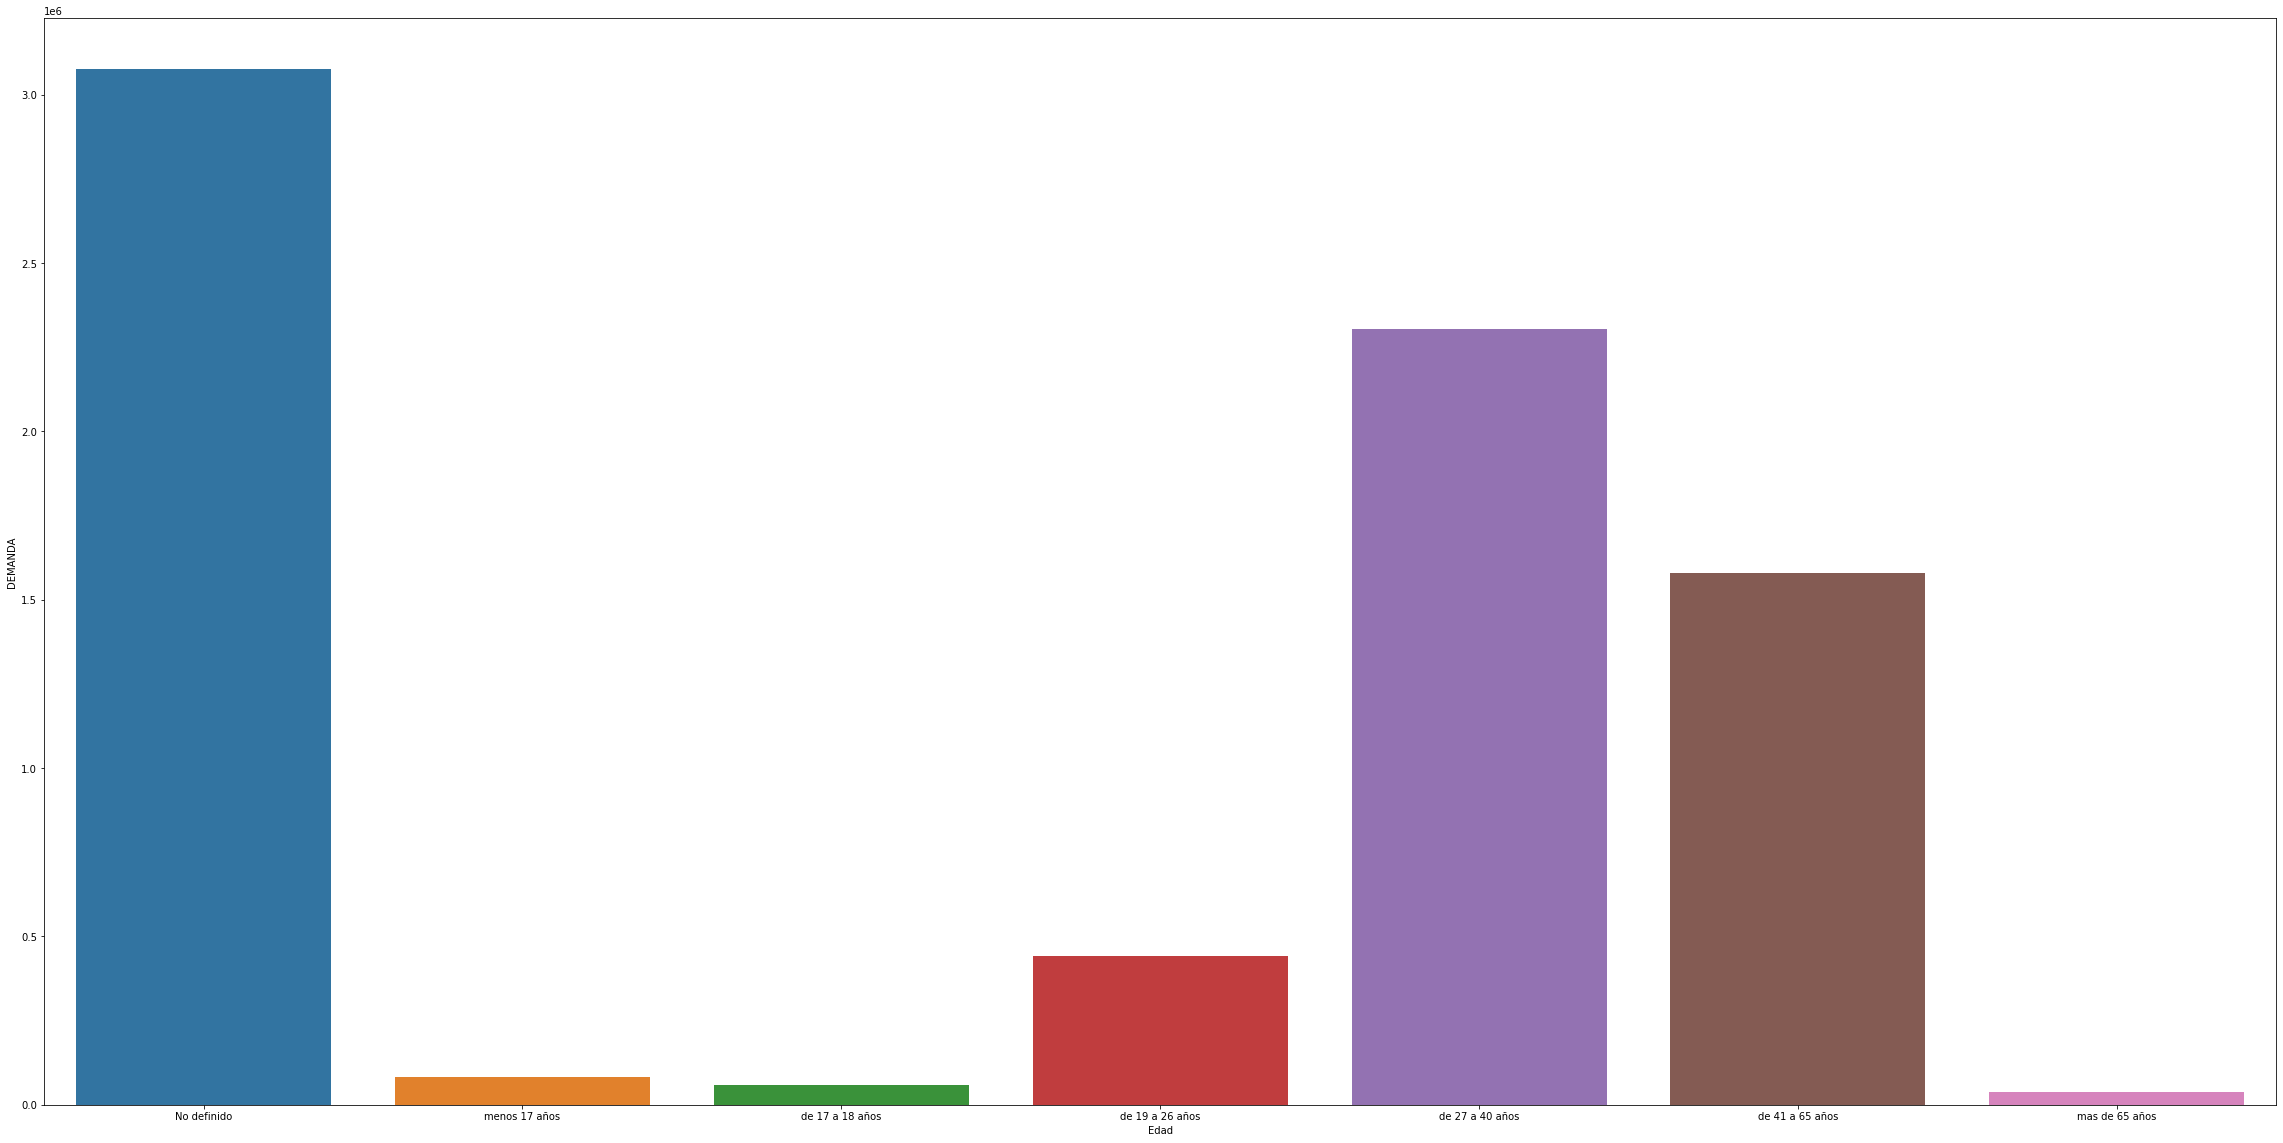

In [32]:
data_edad = data_Tracks[['ageRange','DEMANDA']]
data_edad = data_edad.groupby(['ageRange']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_edad = data_edad.reset_index() 
conditionlist = [
    (data_edad['ageRange'] == 0),
    (data_edad['ageRange'] == 1),
    (data_edad['ageRange'] == 2),
    (data_edad['ageRange'] == 3),
    (data_edad['ageRange'] == 4),
    (data_edad['ageRange'] == 5),
    (data_edad['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_edad['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')
sns.barplot(x="Edad", y="DEMANDA", data=data_edad)



In [33]:
conditionlist = [
    (data_Tracks['ageRange'] == 0),
    (data_Tracks['ageRange'] == 1),
    (data_Tracks['ageRange'] == 2),
    (data_Tracks['ageRange'] == 3),
    (data_Tracks['ageRange'] == 4),
    (data_Tracks['ageRange'] == 5),
    (data_Tracks['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_Tracks['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Edad'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Edad,,,,,,,,
No definido,3009349.0,20.352933,237.245469,-16161.550000,7.866667,11.933333,18.733333,250757.716667
de 17 a 18 años,59118.0,14.401662,17.637867,0.033333,6.583333,10.300000,15.966667,359.200000
de 19 a 26 años,431973.0,17.573127,518.081326,-13704.316667,7.133333,10.950000,16.500000,321214.816667
de 27 a 40 años,2259452.0,16.825363,162.453749,-55.250000,7.466667,11.050000,16.183333,105902.666667
de 41 a 65 años,1544162.0,19.823026,283.214067,-53.716667,7.766667,11.700000,17.650000,199134.033333
mas de 65 años,36745.0,18.901314,22.972571,-11.833333,7.850000,12.066667,19.550000,359.900000
menos 17 años,73652.0,46.324543,461.198555,0.000000,1.316667,21.366667,47.750000,65939.583333


### EDA: Temporada

<AxesSubplot:xlabel='TEMPORADA', ylabel='DEMANDA'>

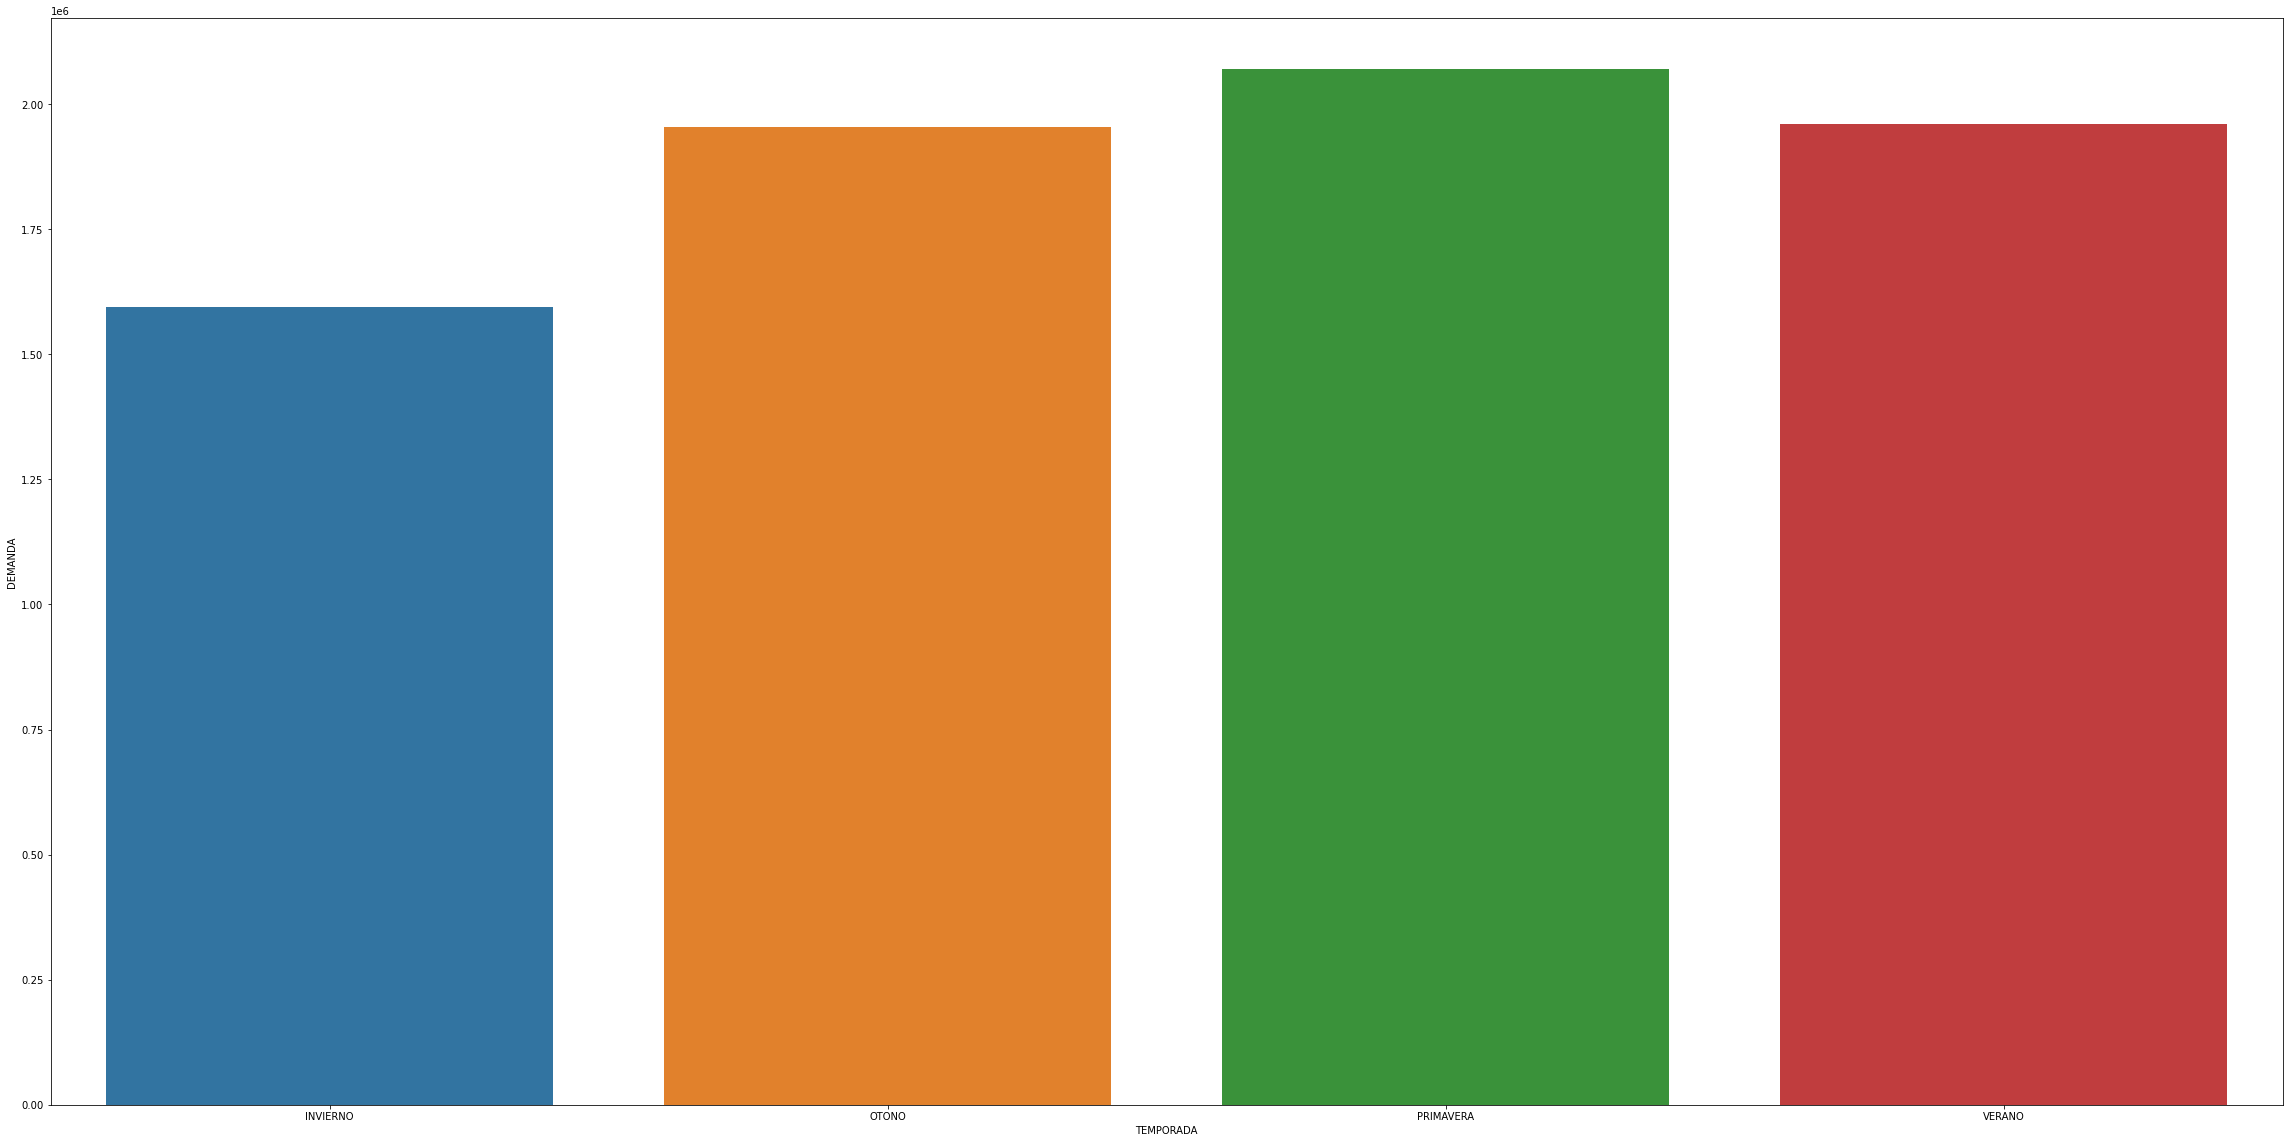

In [34]:
data_temporada = data_Tracks[['TEMPORADA','DEMANDA']]
data_temporada = data_temporada.groupby(['TEMPORADA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_temporada = data_temporada.reset_index() 
sns.barplot(x="TEMPORADA", y="DEMANDA", data=data_temporada) 

In [35]:
data_Tracks.groupby(['TEMPORADA'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
TEMPORADA,,,,,,,,
INVIERNO,1584736.0,19.528645,169.242729,0.000000,7.400000,11.133333,16.966667,62626.333333
OTONO,1944705.0,19.499029,289.184668,-16161.550000,7.666667,11.566667,17.566667,199134.033333
PRIMAVERA,1949451.0,18.664494,133.442768,0.000000,7.716667,11.633333,17.766667,79577.566667
VERANO,1935559.0,19.204250,353.487360,-28.616667,7.783333,11.750000,17.916667,321214.816667


### EDA: AM_PM

<AxesSubplot:xlabel='AM_PM', ylabel='DEMANDA'>

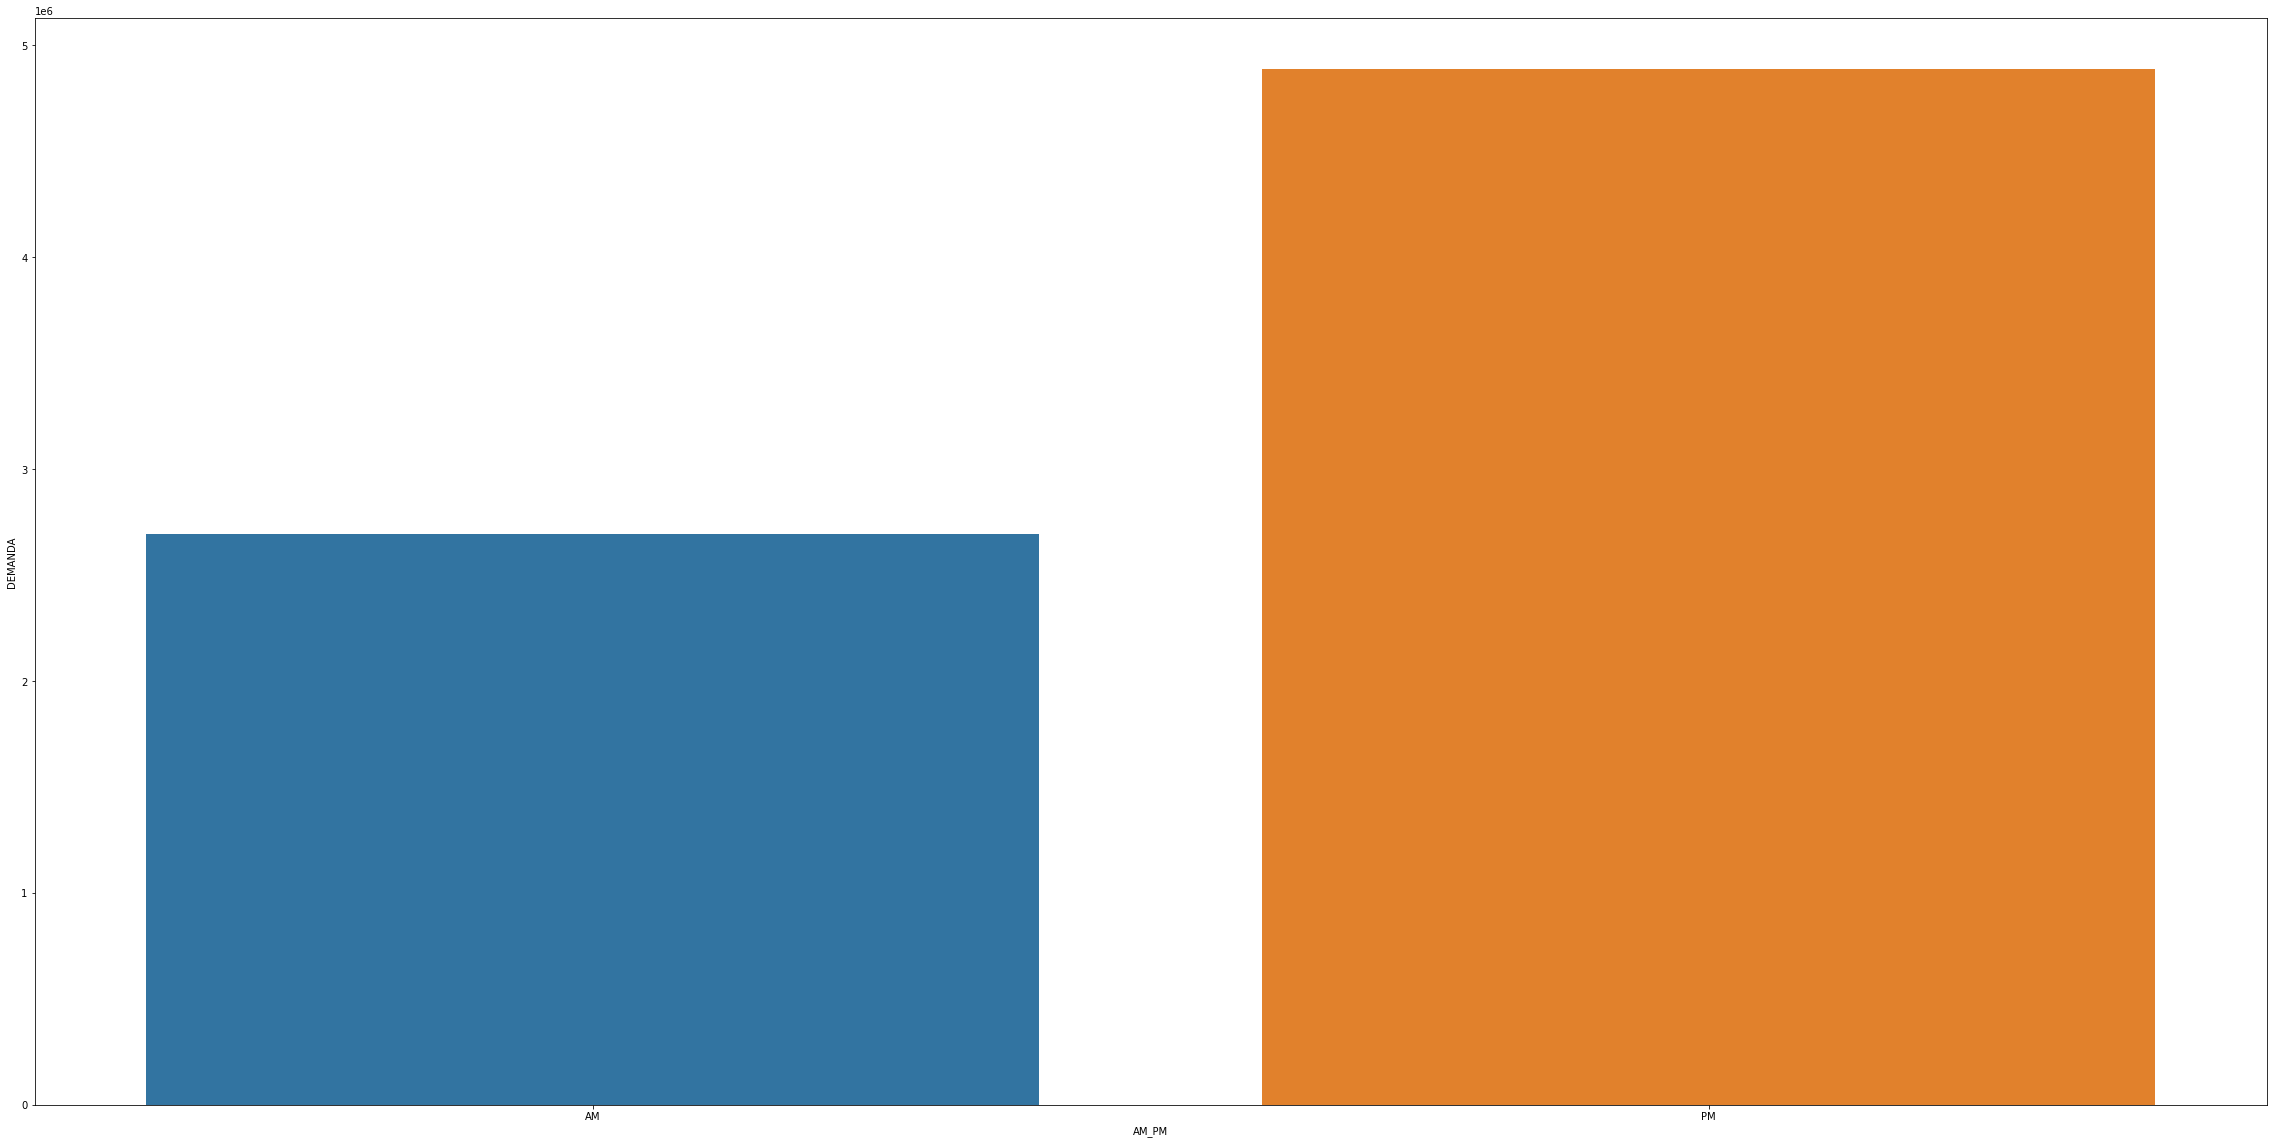

In [36]:
data_horario = data_Tracks[['AM_PM','DEMANDA']]
data_horario = data_horario.groupby(['AM_PM']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_horario = data_horario.reset_index() 
sns.barplot(x="AM_PM", y="DEMANDA", data=data_horario)

In [37]:
data_Tracks.groupby(['AM_PM'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
AM_PM,,,,,,,,
AM,2635143.0,19.922951,363.927928,-16161.55,7.433333,11.283333,17.116667,321214.816667
PM,4779308.0,18.815329,168.429945,-12423.10,7.766667,11.683333,17.850000,99001.483333


### EDA: Stations

Stations de salida mas populares

In [38]:
data_Tracks['idunplug_station'].value_counts().sort_values(ascending=False)[:5]

175    104847
163    100028
135     96287
43      93607
129     92930
Name: idunplug_station, dtype: int64

Stations de llegada mas populares

In [39]:
data_Tracks['idplug_station'].value_counts().sort_values(ascending=False)[:5]

KeyError: 'idplug_station'

# Serie de tiempo

In [40]:
data_serie = data_Tracks[['ANIO','MES','DIA','HORA','idunplug_station','DEMANDA']]
data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],
                                          'month': data_serie["MES"]
                                          ,'day':  data_serie['DIA']
                                         # ,'hour':data_serie['HORA']
                                          },
                                          format='%d-%m-%Y', errors='coerce')
data_serie

C:\Users\gonza\AppData\Local\Temp\ipykernel_19668\2407328087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],


,ANIO,MES,DIA,HORA,idunplug_station,DEMANDA,FECHA
3009639,2018,1,10,0,102,1,2018-01-10
3009640,2018,1,10,0,10,1,2018-01-10
3009641,2018,1,10,0,110,1,2018-01-10
3009642,2018,1,10,0,111,1,2018-01-10
3009643,2018,1,10,0,11,1,2018-01-10
...,...,...,...,...,...,...,...
10424085,2019,12,9,9,92,1,2019-12-09
10424086,2019,12,9,9,94,1,2019-12-09
10424087,2019,12,9,9,95,1,2019-12-09
10424088,2019,12,9,9,95,1,2019-12-09


In [42]:
data_serie_tiempo = data_serie.groupby(['FECHA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_serie_tiempo = data_serie_tiempo.reset_index()
data_serie_tiempo

,FECHA,DEMANDA
0,2018-01-01,4399
1,2018-01-02,7767
2,2018-01-03,9040
3,2018-01-04,9541
4,2018-01-05,6676
...,...,...
698,2019-12-27,6786
699,2019-12-28,5142
700,2019-12-29,4674
701,2019-12-30,6233


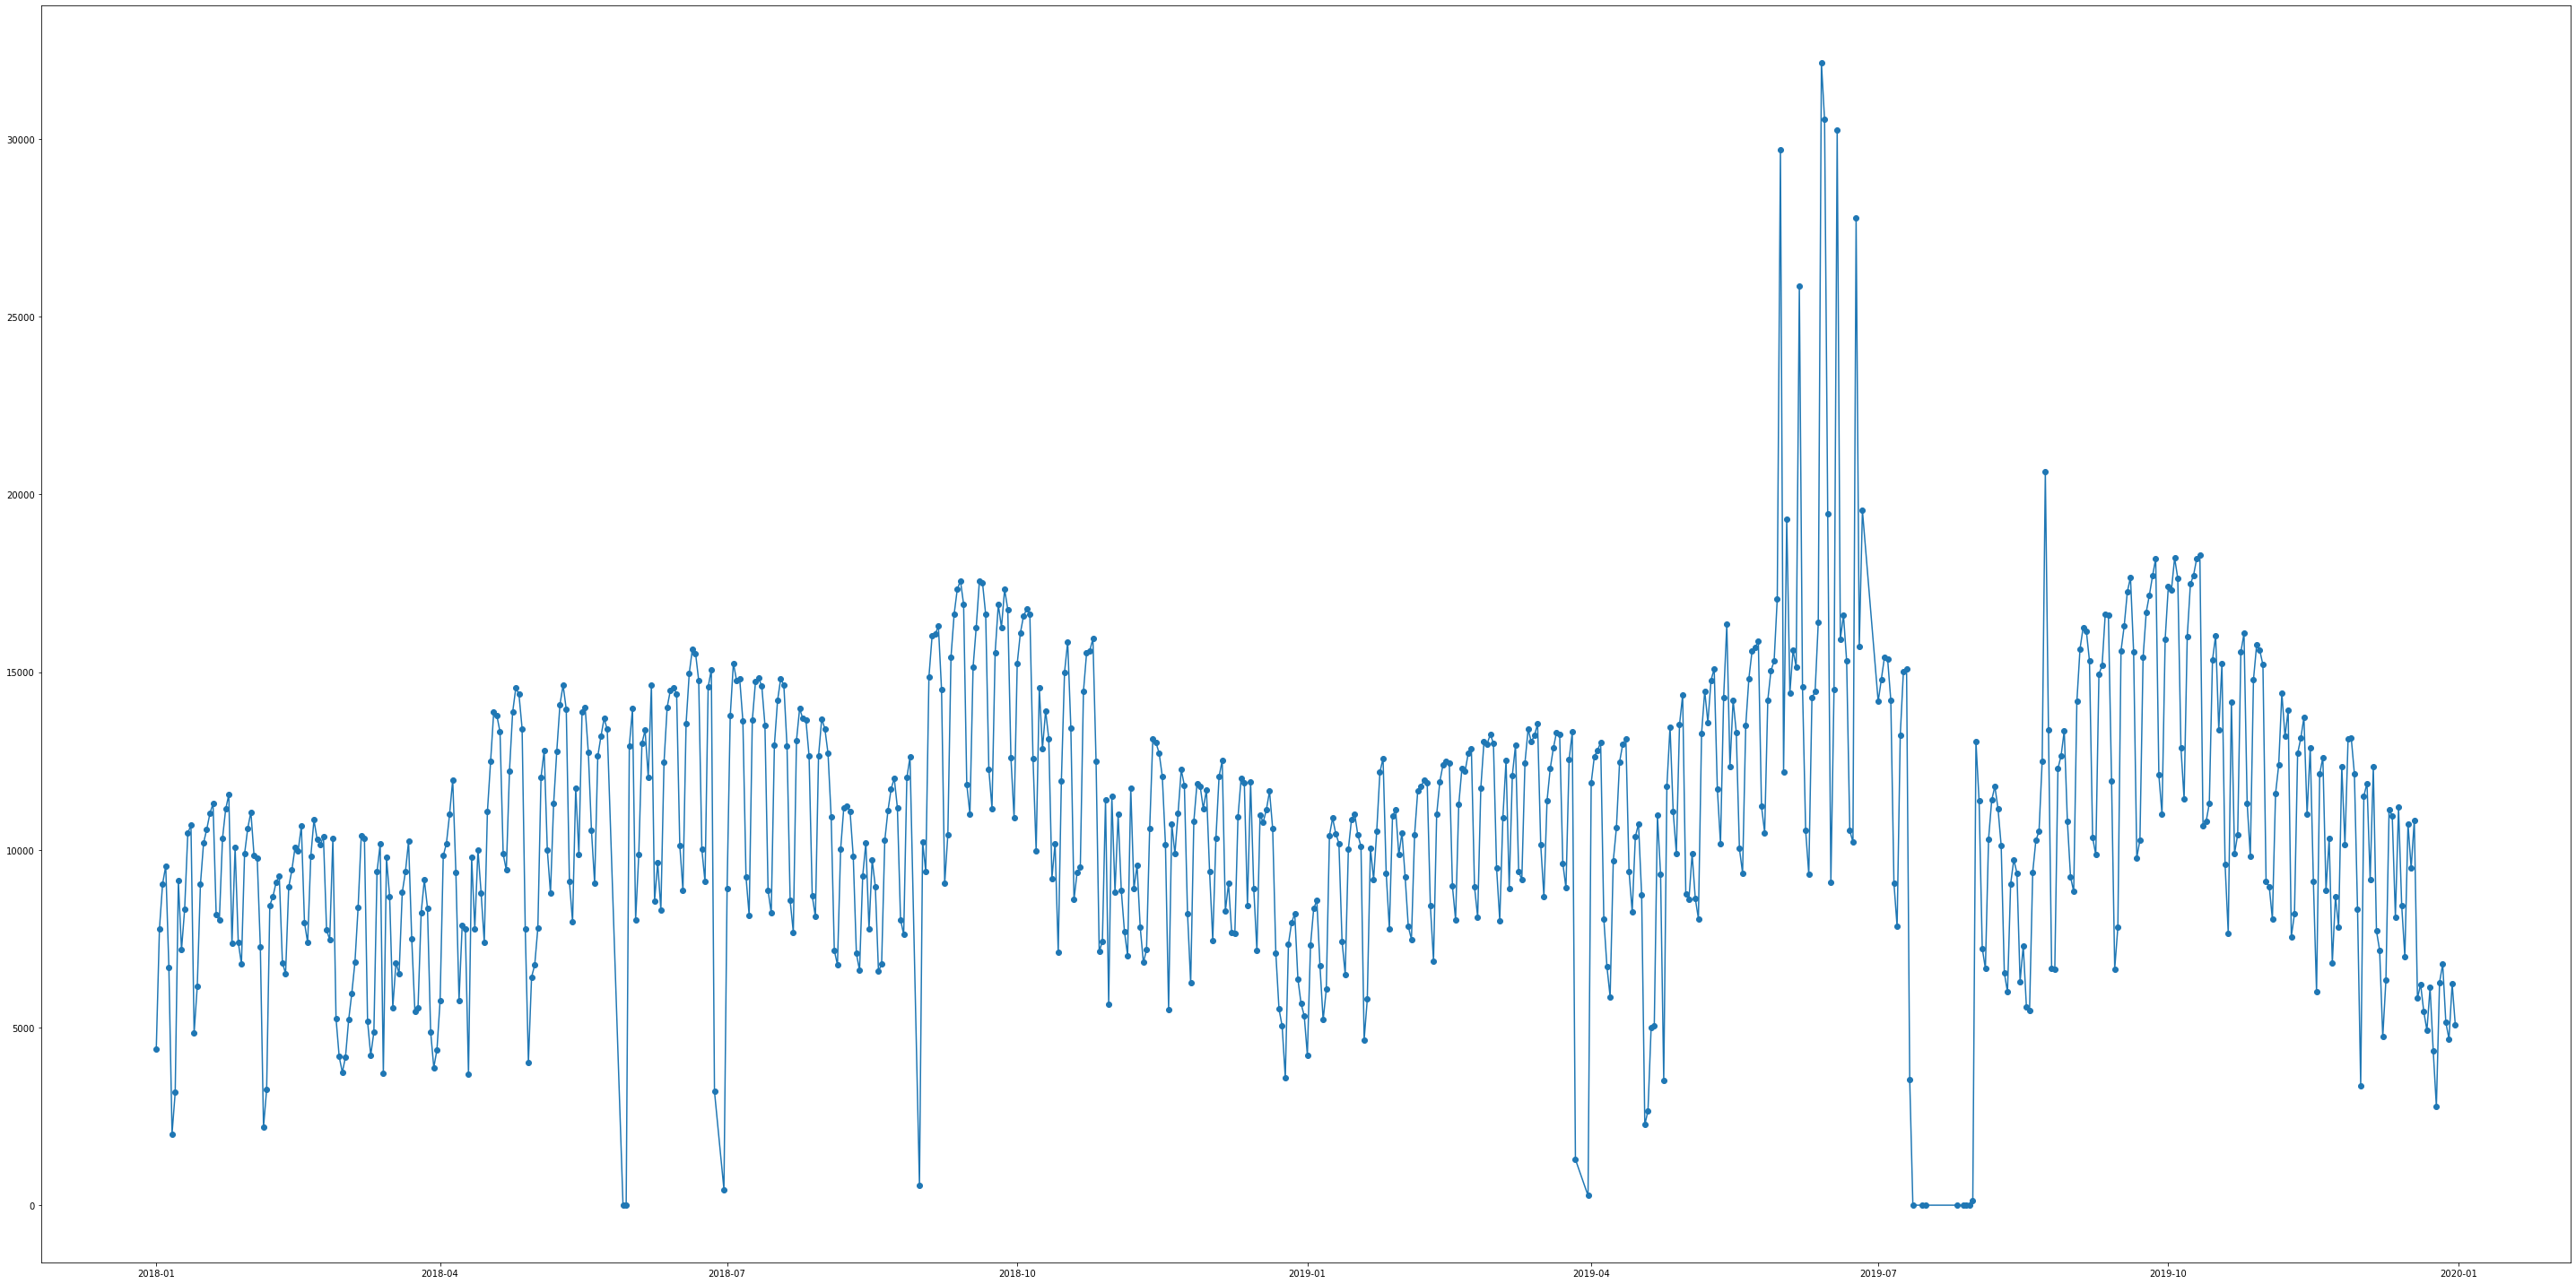

In [43]:
x = data_serie_tiempo['FECHA']
y = data_serie_tiempo['DEMANDA']

plt.plot_date(x, y,linestyle ='solid')
plt.tight_layout()
plt.show()

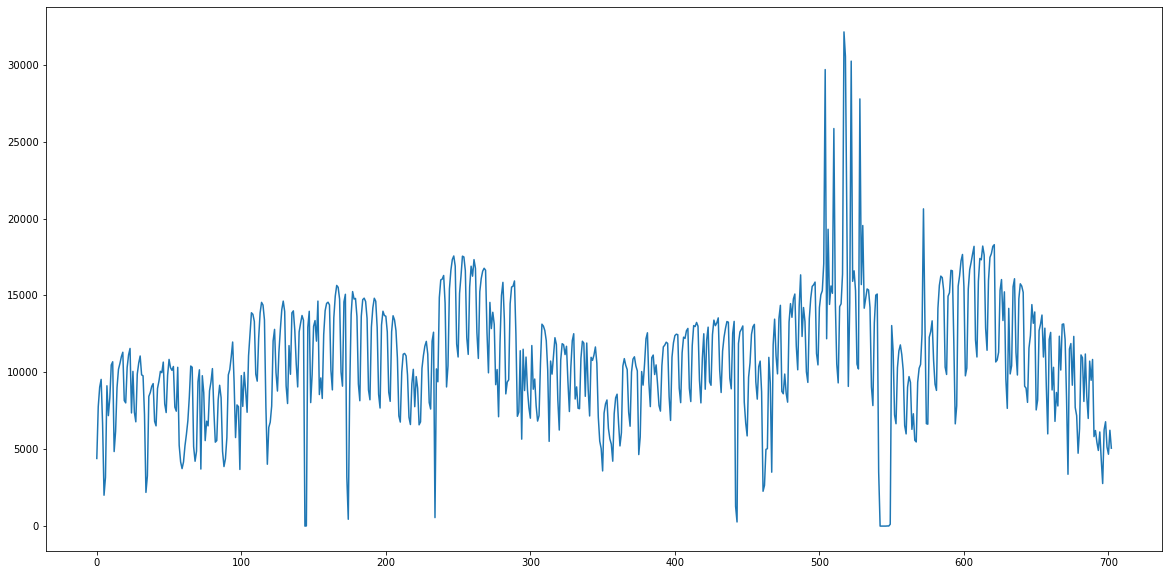

In [44]:
plot = data_serie_tiempo['DEMANDA'].plot(figsize=(20, 10))

In [48]:
import statsmodels.api as sm

In [49]:
ciclo, tend = sm.tsa.filters.hpfilter(data_serie_tiempo['DEMANDA'])
data_serie_tiempo['TENDENCIA'] = tend

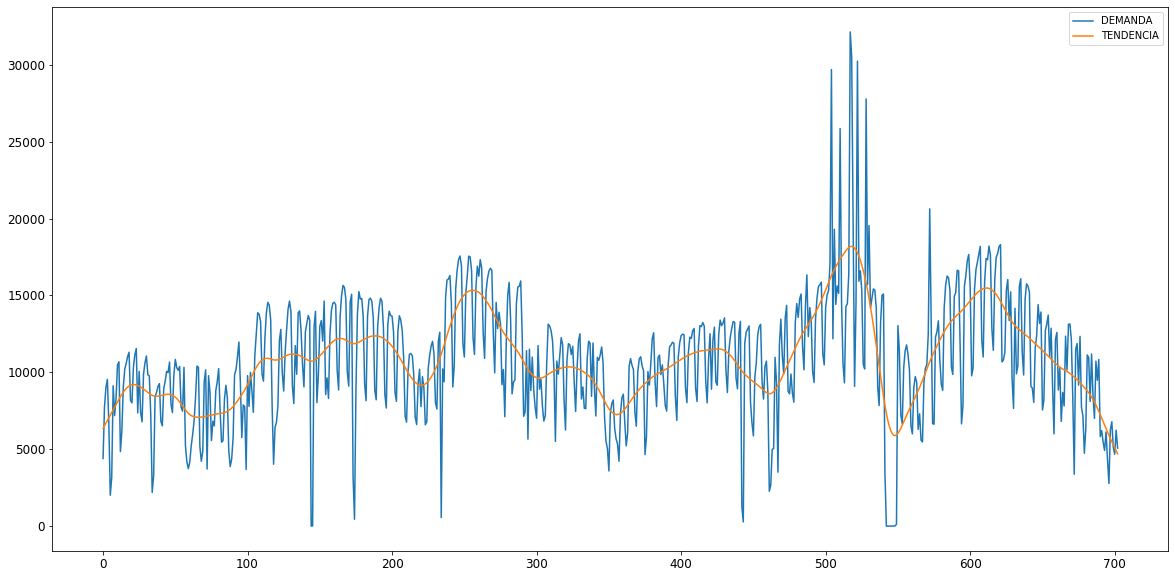

In [50]:
data_serie_tiempo[['DEMANDA','TENDENCIA']].plot(figsize=(20, 10), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);


In [52]:
descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()


TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [53]:
descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],
                                                  model='multiplicative', freq=30)  
fig = descomposicion.plot()


TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'